**Импорт всех необходимых библиотек**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math
from google.colab import files

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 30)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

# 1 Исследовательский анализ данных (exploratory data analysis - EDA)

##1.1 Словесное описание признаков

data.csv

 - id: id транзакции
 - timestamp: дата продажи (транзакции)
 - full_sq: общая площадь
 - life_sq: жилая площадь
 - floor: этаж
 - max_floor: количество этажей в здании
 - material: материал, из которого изговолены стены
 - build_year: год строительства
 - num_room: количество жилых комнат
 - kitch_sq: площадь кухни
 - full_all: количество населения в регионе
 - state: жилищные условия
 - sub_area: название территории
 - price_doc: цена квартиры (целевая переменная)

macro.csv

 - timestamp : дата, на которую актуальны макроэкономические показатели
 - salary : средняя зарплата в регионе
 - fixed_basket: стоимость потребительской корзины
 - rent_price_3room_eco: стоимость аренды 3-х комнатного жилья эконом-класса
 - rent_price_2room_eco: стоимость аренды 2-х комнатного жилья эконом-класса
 - rent_price_1room_eco: стоимость аренды 1-но комнатного жилья эконом-класса
 - average_life_exp: средняя продолжительность жизни в регионе


##1.2 Импортируем данные

In [ ]:
uploaded = files.upload()

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c mlurfuflat

!unzip mlurfuflat.zip

##1.3 Базово изучим данные

###1.3.1 Посмотрим на train датасет

In [ ]:
data = pd.read_csv('train.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15092 non-null  int64  
 1   timestamp   15092 non-null  object 
 2   full_sq     15092 non-null  int64  
 3   life_sq     13828 non-null  float64
 4   floor       15069 non-null  float64
 5   state       12366 non-null  float64
 6   max_floor   13938 non-null  float64
 7   material    13938 non-null  float64
 8   build_year  13475 non-null  object 
 9   num_room    13938 non-null  float64
 10  kitch_sq    13938 non-null  float64
 11  full_all    15092 non-null  int64  
 12  sub_area    15092 non-null  object 
 13  price_doc   15092 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 1.6+ MB
None


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,13324,2013-12-23,42,28.0,8.0,2.0,9.0,1.0,1969.0,2.0,6.0,43795,Pechatniki,7100000
1,10064,2013-08-26,55,41.0,4.0,3.0,5.0,2.0,1960.0,3.0,5.0,21040,Dorogomilovo,11500000
2,12022,2013-11-11,43,29.0,4.0,2.0,5.0,2.0,1960.0,2.0,5.0,157010,Ivanovskoe,5800000
3,10186,2013-08-30,62,35.0,15.0,NaN,22.0,1.0,1985.0,2.0,10.0,178264,Jasenevo,11400000
4,30052,2015-05-29,80,55.0,15.0,1.0,24.0,6.0,2017.0,3.0,12.0,76284,Nagatinskij Zaton,12697154


Столбцец build_year имеет тип данных object, посмотрим почему:

In [ ]:
data['build_year'].unique()

array(['1969.0', '1960.0', '1985.0', '2017.0', '2006.0', '1970.0',
       '1986.0', '1984.0', '2013.0', '1980.0', '2014.0', '1993.0',
       '1997.0', '1981.0', '1964.0', '1979.0', '2004.0', '0.0', '1994.0',
       nan, '1972.0', '1.0', '2010.0', '2012.0', '1976.0', '2000.0',
       '1966.0', '2015.0', '1989.0', '1987.0', '1932.0', '1977.0',
       '1983.0', '1962.0', '2008.0', '2003.0', '1965.0', '1990.0',
       '1971.0', '1978.0', '1974.0', '1961.0', '2016.0', '1959.0',
       '1975.0', '1957.0', '1968.0', '1992.0', '1967.0', '1956.0',
       '1995.0', '1988.0', '1958.0', '1973.0', '1999.0', '2005.0',
       '2002.0', '2007.0', '2001.0', '1982.0', '1950.0', '2011.0',
       '1951.0', '1955.0', '1991.0', '1952.0', '1963.0', '2009.0',
       '1998.0', '1890.0', '1954.0', '1927.0', '1917.0', '1930.0',
       '1937.0', '1996.0', '1929.0', '1910.0', '1926.0', '1928.0',
       '1953.0', '1912.0', '1947.0', '1931.0', '1938.0', '1940.0', '20.0',
       '1915.0', '1933.0', '1934.0', '1936.0'

Кроме прочих ошибочно заполненных данных есть строка 'o', посмотрим, что это может значить, и много ли таких строк:

In [ ]:
data[data['build_year'] == 'o'] # похоже на ошибку заполнения, и в целом это достаточно плохая строка

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
2913,22469,2014-09-12,29,NaN,2.0,NaN,10.0,1.0,o,1.0,1.0,2942,Poselenie Filimonkovskoe,2205352


In [ ]:
data['build_year'] = pd.to_numeric(data['build_year'], errors='coerce', downcast='float')
                                                                                                  #поменяем тип данных на числовой, строка заменится на nan
data.describe(include='all')

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
count,15092.0000,15092,15092.000,13828.0000,15069.0000,12366.0000,13938.0000,13938.0000,1.3474e+04,13938.0000,13938.0000,1.5092e+04,15092,1.5092e+04
unique,NaN,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,NaN
top,NaN,2014-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poselenie Sosenskoe,NaN
freq,NaN,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,502,NaN
mean,18772.4277,NaN,53.967,33.7849,7.2833,2.1949,12.4191,1.8958,3.3681e+03,1.9348,7.2806,1.5923e+05,NaN,7.5647e+06
std,7102.9068,NaN,48.082,19.7944,5.1940,0.8610,6.2642,1.5114,1.7273e+05,0.8657,30.0719,3.0380e+05,NaN,4.9852e+06
min,15.0000,NaN,0.000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000e+00,0.0000,0.0000,2.5460e+03,NaN,3.3146e+05
25%,13464.7500,NaN,38.000,20.0000,3.0000,2.0000,9.0000,1.0000,1.9660e+03,1.0000,5.0000,4.8439e+04,NaN,5.1000e+06
50%,19005.5000,NaN,49.000,30.0000,6.0000,2.0000,12.0000,1.0000,1.9790e+03,2.0000,7.0000,8.7713e+04,NaN,6.6500e+06
75%,24746.2500,NaN,63.000,43.0000,10.0000,3.0000,17.0000,2.0000,2.0050e+03,3.0000,9.0000,1.2535e+05,NaN,8.9000e+06


Первые выводы по данным:

1. По строке count можно видеть, что есть пропущенные значения во всех столбцах, кроме id, timestamp, full_sq, full_all и sub_area;
2. Также можно сразу видеть, что максимальное значение в столбце full_sq нереалистично, судя по информации в интернете, в России самая большая по площади квартира ~2 тыс. кв.м.;
3. Кроме этого, минимальные значения из столбцов full_sq, life_sq нереалистичны;
4. Минимальное значение floor = 0, что, возможно, является ошибкой. Для max_floor = 0 - ошибка;
5. Минимальное и максимальное значение build_year невозможны;
6. Минимальное значение num_room = 0, скорее всего ошибка, должно быть 1;
7. Максимальное значение kitch_sq невозможно.

Рассмотрим категориальные признаки: state, material и sub_area:

In [ ]:
data.state.value_counts()

2.0     4671
3.0     4546
1.0     2821
4.0      327
33.0       1
Name: state, dtype: int64

Одно значение 33, что, очевидно, ошибка заполнения.

In [ ]:
data.material.value_counts()

1.0    9012
2.0    2285
5.0    1261
4.0     870
6.0     509
3.0       1
Name: material, dtype: int64

Только одно значение 3, что кажется странным.

In [ ]:
data.sub_area.value_counts()

Poselenie Sosenskoe               502
Nekrasovka                        488
Poselenie Vnukovskoe              464
Mitino                            318
Mar'ino                           315
                                 ... 
Molzhaninovskoe                     2
Poselenie Klenovskoe                1
Poselenie Shhapovskoe               1
Poselenie Kievskij                  1
Poselenie Mihajlovo-Jarcevskoe      1
Name: sub_area, Length: 146, dtype: int64

In [ ]:
data.sub_area.value_counts().values

array([502, 488, 464, 318, 315, 286, 281, 276, 250, 218, 214, 212, 197,
       183, 179, 176, 171, 166, 165, 164, 161, 159, 154, 154, 151, 149,
       148, 143, 143, 140, 139, 139, 138, 137, 135, 134, 134, 133, 131,
       130, 126, 125, 121, 119, 118, 118, 117, 116, 116, 113, 112, 112,
       111, 110, 110, 109, 108, 105, 104, 103, 101,  99,  99,  99,  98,
        97,  96,  95,  94,  93,  93,  92,  92,  88,  87,  87,  86,  84,
        84,  84,  82,  80,  80,  77,  76,  74,  73,  72,  71,  70,  69,
        69,  68,  66,  66,  66,  66,  65,  64,  62,  62,  60,  59,  59,
        57,  56,  54,  53,  53,  52,  52,  50,  48,  46,  46,  45,  43,
        42,  41,  41,  41,  39,  39,  35,  33,  31,  30,  29,  26,  24,
        24,  20,  18,  12,  12,  11,   9,   6,   5,   5,   4,   2,   1,
         1,   1,   1])

###1.3.2 Посмотрим на test датасет

In [ ]:
sub = pd.read_csv('test.csv')
print(sub.info())
sub.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3774 non-null   int64  
 1   timestamp   3774 non-null   object 
 2   full_sq     3774 non-null   int64  
 3   life_sq     3463 non-null   float64
 4   floor       3769 non-null   float64
 5   state       3139 non-null   float64
 6   max_floor   3507 non-null   float64
 7   material    3507 non-null   float64
 8   build_year  3391 non-null   float64
 9   num_room    3507 non-null   float64
 10  kitch_sq    3507 non-null   float64
 11  full_all    3774 non-null   int64  
 12  sub_area    3774 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 383.4+ KB
None


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area
0,1417,2012-03-03,51,31.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,221709,Krjukovo
1,9725,2013-08-08,44,29.0,5.0,3.0,9.0,1.0,1969.0,2.0,5.0,37502,Sviblovo
2,30369,2015-06-23,32,18.0,1.0,3.0,9.0,1.0,1970.0,1.0,6.0,125354,Chertanovo Severnoe
3,20522,2014-07-02,51,30.0,11.0,1.0,17.0,1.0,2003.0,2.0,9.0,130229,Moskvorech'e-Saburovo
4,12891,2013-12-07,44,28.0,4.0,2.0,5.0,1.0,1965.0,2.0,5.0,145576,Caricyno


In [ ]:
sub.describe(include='all')

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area
count,3774.0000,3774,3774.0000,3463.0000,3769.0000,3139.0000,3507.0000,3507.0000,3391.0000,3507.0000,3507.0000,3.7740e+03,3774
unique,NaN,782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143
top,NaN,2014-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nekrasovka
freq,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132
mean,18909.2032,NaN,53.8365,36.1528,7.3354,2.2265,12.4400,1.8674,1876.8540,1.9350,6.9116,1.6166e+05,NaN
std,6999.8031,NaN,22.0064,127.9712,5.1802,0.8196,6.3424,1.4848,456.7174,0.8584,5.2178,3.0660e+05,NaN
min,9.0000,NaN,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,2.6930e+03,NaN
25%,13719.7500,NaN,38.0000,20.0000,3.0000,2.0000,9.0000,1.0000,1967.0000,1.0000,5.0000,5.3786e+04,NaN
50%,19137.5000,NaN,49.0000,30.0000,6.0000,2.0000,12.0000,1.0000,1980.0000,2.0000,7.0000,8.7713e+04,NaN
75%,24757.7500,NaN,63.0000,43.0000,11.0000,3.0000,17.0000,2.0000,2005.0000,3.0000,9.0000,1.2535e+05,NaN


Первые выводы по данным:

1. По строке count можно видеть, что есть пропущенные значения во всех столбцах, кроме id, timestamp, full_sq, full_all и sub_area;
2. Максимальное значение в столбце full_sq на порядок меньше значения в life_sq, что противоречит логике;
3. Максимальное значение в life_sq нереалистично;
4. Минимальные значения из столбцов full_sq, life_sq также нереалистичны;
5. Минимальное значение floor = 0, что, возможно, является ошибкой. Для max_floor = 0 - ошибка;
6. Минимальное и максимальное значение build_year неовзможны;
7. Минимальное значение num_room = 0, скорее всего ошибка, должно быть 1.

Рассмотрим категориальные признаки: state, material и sub_area:

In [ ]:
sub.state.value_counts()

3.0    1208
2.0    1152
1.0     685
4.0      94
Name: state, dtype: int64

Ничего необычного. Похоже на то, что имеем в data.

In [ ]:
sub.material.value_counts()

1.0    2273
2.0     603
5.0     282
4.0     217
6.0     132
Name: material, dtype: int64

In [ ]:
data[data['material'] == 3]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
6303,24718,2014-11-13,61,NaN,8.0,NaN,1.0,3.0,NaN,2.0,10.0,13890,Poselenie Sosenskoe,6931143


Пропущено значение 3. Учитывая, что в data только одно такое значение, можно будет заменить это значение на более часто встречающееся.

In [ ]:
sub.sub_area.value_counts()

Nekrasovka                 132
Poselenie Sosenskoe        111
Poselenie Vnukovskoe       110
Mitino                     101
Juzhnoe Butovo              75
                          ... 
Poselenie Voronovskoe        1
Poselenie Kokoshkino         1
Poselenie Kievskij           1
Poselenie Marushkinskoe      1
Molzhaninovskoe              1
Name: sub_area, Length: 143, dtype: int64

In [ ]:
sub.sub_area.value_counts().values

array([132, 111, 110, 101,  75,  68,  64,  62,  59,  54,  53,  49,  46,
        46,  45,  45,  45,  45,  44,  44,  43,  43,  40,  40,  38,  37,
        36,  35,  35,  35,  35,  34,  34,  34,  34,  33,  33,  33,  33,
        33,  32,  32,  32,  32,  31,  31,  31,  30,  30,  30,  30,  30,
        29,  28,  28,  27,  27,  27,  27,  26,  26,  26,  25,  25,  25,
        24,  23,  23,  23,  22,  21,  21,  20,  20,  20,  20,  20,  20,
        20,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  18,  18,
        18,  18,  17,  17,  17,  17,  16,  16,  16,  15,  15,  14,  14,
        14,  14,  14,  14,  13,  13,  13,  13,  13,  12,  12,  12,  12,
        11,  11,  11,  10,  10,   9,   9,   9,   7,   7,   6,   6,   5,
         5,   5,   4,   3,   2,   2,   1,   1,   1,   1,   1,   1,   1])

### 1.3.3 Проанализируем дополнительный датасет с макроэкономическими данными

In [ ]:
macro = pd.read_csv('macro.csv')
print(macro.info())
macro.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             2484 non-null   object 
 1   salary                2191 non-null   float64
 2   fixed_basket          2484 non-null   float64
 3   rent_price_3room_eco  2211 non-null   float64
 4   rent_price_2room_eco  2211 non-null   float64
 5   rent_price_1room_eco  2211 non-null   float64
 6   average_life_exp      2191 non-null   float64
dtypes: float64(6), object(1)
memory usage: 136.0+ KB
None


,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,2010-01-01,38410.5,11443.63,NaN,NaN,NaN,74.2
1,2010-01-02,38410.5,11443.63,NaN,NaN,NaN,74.2
2,2010-01-03,38410.5,11443.63,NaN,NaN,NaN,74.2
3,2010-01-04,38410.5,11443.63,NaN,NaN,NaN,74.2
4,2010-01-05,38410.5,11443.63,NaN,NaN,NaN,74.2


In [ ]:
macro.describe(include='all')

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
count,2484,2191.0000,2484.0000,2211.0000,2211.0000,2211.0000,2191.0000
unique,2484,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,52188.9331,15331.4980,47.2997,38.8954,31.0024,75.9282
std,NaN,9068.5590,2789.1363,3.0702,5.0352,3.9841,0.8699
min,NaN,38410.5000,11443.6300,37.5400,0.1000,2.3100,74.2000
25%,NaN,44898.7000,12992.4400,45.5300,37.9300,29.7800,75.7400
50%,NaN,48830.4000,14983.9200,47.3500,39.4700,31.1100,75.7900
75%,NaN,61208.0000,18295.0700,49.3500,41.3000,33.0600,76.7000


Есть пропуски в данных, нереалистично выглядят минимальные значения столбцов rent_price_2room_eco и rent_price_1room_eco, особенно первого.

## 1.4 Создадим датасеты для работы

Соединим data и test с macro, в качестве исходных данных, и сделаем их копии, которые в последствии будем менять.

In [ ]:
raw_data = pd.merge(data, macro, how='left', on='timestamp')
proc_data = raw_data.copy()
print(raw_data.shape)
raw_data.head()

(15092, 20)


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,13324,2013-12-23,42,28.0,8.0,2.0,9.0,1.0,1969.0,2.0,6.0,43795,Pechatniki,7100000,55485.2,15417.34,48.50,42.00,33.97,76.37
1,10064,2013-08-26,55,41.0,4.0,3.0,5.0,2.0,1960.0,3.0,5.0,21040,Dorogomilovo,11500000,55485.2,15241.93,48.22,42.33,33.15,76.37
2,12022,2013-11-11,43,29.0,4.0,2.0,5.0,2.0,1960.0,2.0,5.0,157010,Ivanovskoe,5800000,55485.2,15367.58,49.29,42.02,34.55,76.37
3,10186,2013-08-30,62,35.0,15.0,NaN,22.0,1.0,1985.0,2.0,10.0,178264,Jasenevo,11400000,55485.2,15241.93,48.22,42.33,33.15,76.37
4,30052,2015-05-29,80,55.0,15.0,1.0,24.0,6.0,2017.0,3.0,12.0,76284,Nagatinskij Zaton,12697154,64310.0,18745.28,50.42,39.16,31.09,76.77


In [ ]:
raw_sub = pd.merge(sub, macro, how='left', on='timestamp')
proc_sub = raw_sub.copy()
print(raw_sub.shape)
raw_sub.head()

(3774, 19)


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,1417,2012-03-03,51,31.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,221709,Krjukovo,48830.4,13243.77,45.31,38.45,31.64,75.74
1,9725,2013-08-08,44,29.0,5.0,3.0,9.0,1.0,1969.0,2.0,5.0,37502,Sviblovo,55485.2,15241.93,48.22,42.33,33.15,76.37
2,30369,2015-06-23,32,18.0,1.0,3.0,9.0,1.0,1970.0,1.0,6.0,125354,Chertanovo Severnoe,64310.0,18720.65,49.01,38.91,30.29,76.77
3,20522,2014-07-02,51,30.0,11.0,1.0,17.0,1.0,2003.0,2.0,9.0,130229,Moskvorech'e-Saburovo,61208.0,16251.41,50.93,41.97,33.67,76.70
4,12891,2013-12-07,44,28.0,4.0,2.0,5.0,1.0,1965.0,2.0,5.0,145576,Caricyno,55485.2,15417.34,48.50,42.00,33.97,76.37


## 1.5 Визуальный анализ, исправление и обогащение данных

###1.5.1 Площади `full_sq`, `life_sq`, `kitch_sq`

Поскольку эти три признаки напрямую взаимосвязаны, будем рассматривать их вместе.

Помним, что в площадях есть много данных с выбросами:

<Axes: xlabel='full_sq'>

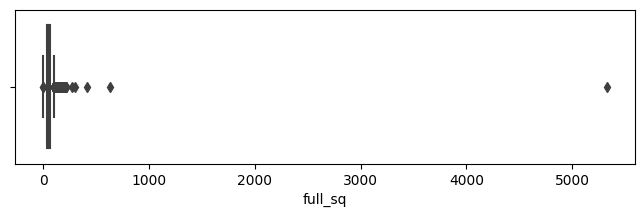

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=proc_data, x='full_sq')

Посмотрим на этот выброс отдельно:

In [ ]:
proc_data[proc_data['full_sq'] > 5000]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
11944,3530,2012-09-07,5326,22.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,1716730,Birjulevo Vostochnoe,6868818,48830.4,13726.03,47.3,40.66,32.9,75.74


Судя по остальным данным - это ошибка. Кроме того, судя по информации в интернете в России нет квартир больше ~2,2 тыс. кв. м. Используем это, чтобы ограничить верхний предел общей площади. А это значение пока заменим на nan.

In [ ]:
def correct_full_sq_for_max_limits(data, max_sq_limit):
  data['full_sq'] = data['full_sq'].mask(data['full_sq'] >= max_sq_limit)

  return data

<Axes: xlabel='full_sq'>

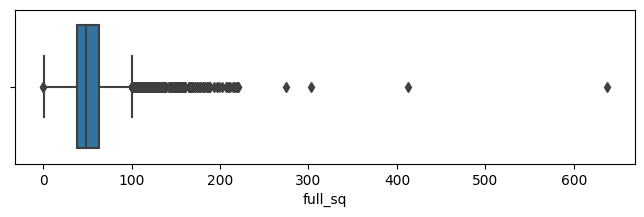

In [ ]:
max_possible_sq = 2200

proc_data = correct_full_sq_for_max_limits(proc_data, max_possible_sq)
proc_sub = correct_full_sq_for_max_limits(proc_sub, max_possible_sq)

plt.figure(figsize=(8, 2))
sns.boxplot(data=proc_data, x='full_sq')

Рассмотрим экстремально низкие значения:

<Axes: xlabel='price_doc', ylabel='full_sq'>

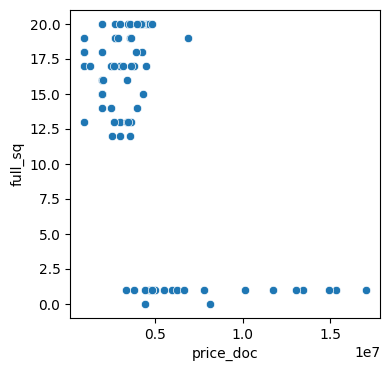

In [ ]:
plt.figure(figsize=(4, 4))
condition_sq = proc_data['full_sq'].between(0, 20)
sns.scatterplot(data=proc_data[condition_sq], x='price_doc', y='full_sq')

In [ ]:
proc_data[proc_data['full_sq'].isin([0, 1])].sort_values('full_sq').head(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
12103,24299,2014-11-05,0.0,77.0,4.0,1.0,17.0,1.0,0.0,3.0,0.0,17790,Poselenie Vnukovskoe,8167508,61208.0,16648.70,53.21,43.23,34.30,76.7
6125,17935,2014-04-28,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9553,Poselenie Voskresenskoe,4425000,61208.0,16041.58,49.32,40.95,32.96,76.7
33,16741,2014-03-31,1.0,1.0,1.0,3.0,1.0,4.0,1.0,1.0,1.0,9553,Poselenie Voskresenskoe,7820575,61208.0,15916.88,49.75,41.91,33.26,76.7
13096,22415,2014-09-11,1.0,47.0,11.0,1.0,17.0,1.0,2014.0,1.0,1.0,57999,Presnenskoe,14923206,61208.0,16165.30,51.41,43.26,34.52,76.7
11250,27157,2014-12-26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,115352,Nagornoe,15318960,61208.0,16910.54,49.89,42.64,34.33,76.7


Ясно видно, что в случаях, где жилая площадь больше общей, там присутствует ошибка в данных. Но в целом, согласно информации в интернете, продажа сколь угодно маленьких долей в квартире была возможна до недавнего времени. Так как это по сути фиктивные сделки, то сделаем признак, отражающий этот факт. И отредактируем ошибочные данные:

In [ ]:
def correct_full_sq_for_min_limits(data, min_sq_limit):
  full_sq_condition = data['full_sq'] <= min_sq_limit
  life_sq_condition = data['life_sq'] > data['full_sq']

  data['full_sq'] = data['full_sq'].mask(full_sq_condition & life_sq_condition, data['life_sq'])

  return data

In [ ]:
min_possible_sq = 5 #размер самой маленькой квартиры в России, согласно интернету

proc_data = correct_full_sq_for_min_limits(proc_data, min_possible_sq)
proc_sub = correct_full_sq_for_min_limits(proc_sub, min_possible_sq)

Если после операции выше остались общие площади < 5 кв.м., то заменим их на 1:

In [ ]:
def push_zero_to_one(data, min_sq_limit):
  data['full_sq'] = data['full_sq'].mask(data['full_sq'] < min_sq_limit, 1)

  return data

<Axes: xlabel='price_doc', ylabel='full_sq'>

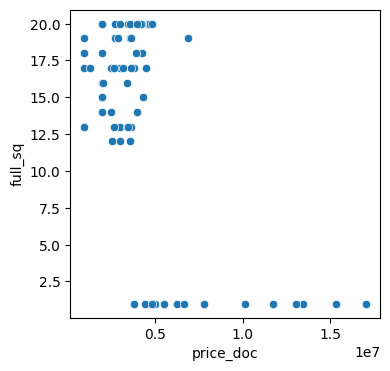

In [ ]:
proc_data = push_zero_to_one(proc_data, min_possible_sq)
proc_sub = push_zero_to_one(proc_sub, min_possible_sq)

plt.figure(figsize=(4, 4))
condition_sq = proc_data['full_sq'].between(0, 20)
sns.scatterplot(data=proc_data[condition_sq], x='price_doc', y='full_sq')

Признак для обозначения фиктивных сделок:

In [ ]:
def create_feature_for_fict_deal(data, min_sq_limit):
  data['fict_deal'] = np.where(data['full_sq'] < min_sq_limit, 1, 0)

  return data

In [ ]:
proc_data = create_feature_for_fict_deal(proc_data, min_possible_sq)
proc_sub = create_feature_for_fict_deal(proc_sub, min_possible_sq)

proc_data[proc_data['full_sq'] == 1].sort_values('full_sq').head(1)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal
33,16741,2014-03-31,1.0,1.0,1.0,3.0,1.0,4.0,1.0,1.0,1.0,9553,Poselenie Voskresenskoe,7820575,61208.0,15916.88,49.75,41.91,33.26,76.7,1


Теперь снова посмотрим на общую площадь:

<Axes: xlabel='full_sq', ylabel='Count'>

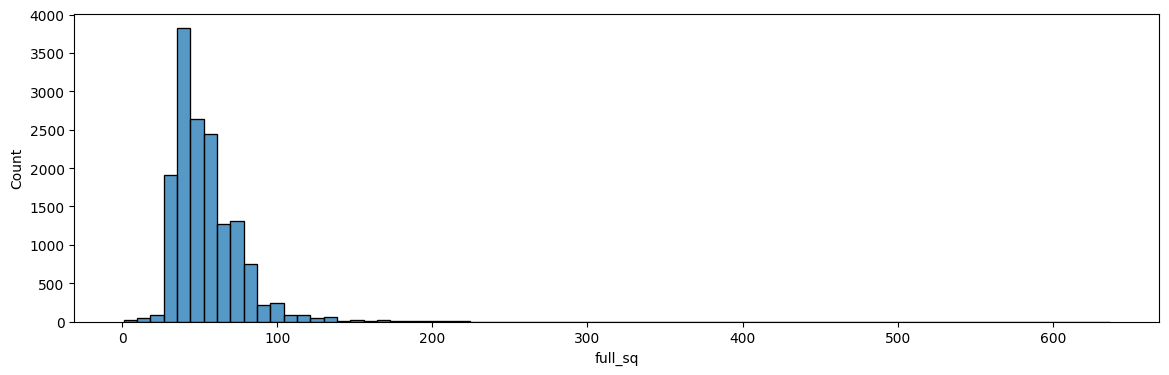

In [ ]:
plt.figure(figsize=(14, 4))
sns.histplot(data=proc_data, x='full_sq', bins=74)

<Axes: xlabel='full_sq', ylabel='Count'>

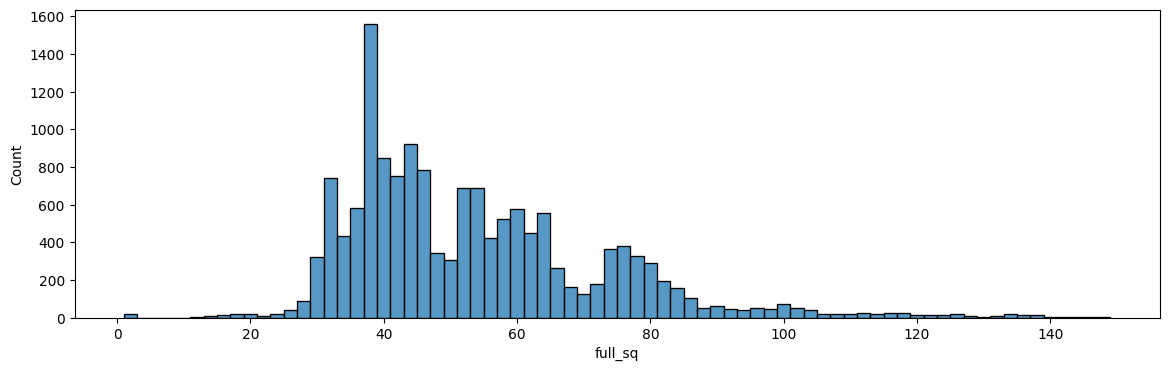

In [ ]:
plt.figure(figsize=(14, 4))
sns.histplot(data=proc_data[proc_data['full_sq'] < 150], x='full_sq', bins=74)

Теперь заполним пропуски в данных с помощью среднего значения по всем данным:

In [ ]:
proc_data[proc_data['full_sq'].isna()].sample()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal
11944,3530,2012-09-07,NaN,22.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,1716730,Birjulevo Vostochnoe,6868818,48830.4,13726.03,47.3,40.66,32.9,75.74,0


In [ ]:
def full_sq_nan_to_avg(data, avg_full_sq):
  data['full_sq'] = data['full_sq'].mask(proc_data['full_sq'].isna(), avg_full_sq)

  return data

In [ ]:
avg_full_sq = round(proc_data['full_sq'].mean())
print('Средняя общая площадь квартиры: ', avg_full_sq)

proc_data = full_sq_nan_to_avg(proc_data, avg_full_sq)
proc_sub = full_sq_nan_to_avg(proc_sub, avg_full_sq)

Средняя общая площадь квартиры:  54


Для дальнейшей оценки жилой и кухонной площади разделим общую площадь на несколько категорий:

In [ ]:
def create_cat_from_full_sq(data):
  data['sq_cat'] = pd.cut(data['full_sq'], [min_possible_sq, 25, 40, 55, 70, 85, max_possible_sq]
                          , labels=['1', '2', '3', '4', '5', '6'])

  return data['sq_cat']

<Axes: xlabel='full_sq', ylabel='Count'>

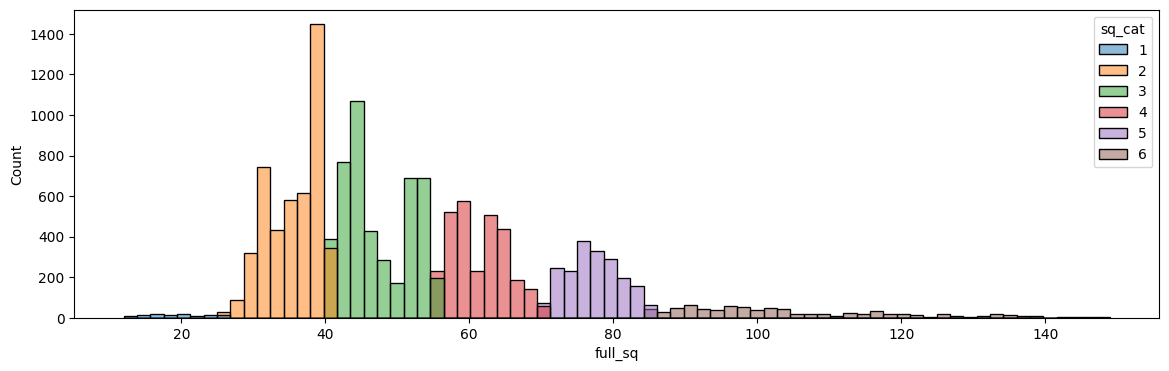

In [ ]:
proc_data['sq_cat'] = create_cat_from_full_sq(proc_data)
proc_sub['sq_cat'] = create_cat_from_full_sq(proc_sub)

plt.figure(figsize=(14, 4))
sns.histplot(data=proc_data[proc_data['full_sq'] < 150], x='full_sq', hue='sq_cat', bins=74)

Перейдем к жилой площади:

<Axes: xlabel='full_sq', ylabel='life_sq'>

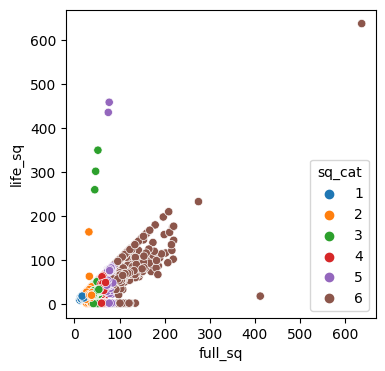

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=proc_data, x='full_sq', y='life_sq', hue='sq_cat')

Очевидно, что жилая площадь не может быть больше общей. Это значит, что данные строк, соответствующие точки которых находятся выше линии life_sq = full_sq, определены ошибочно. Условимся в таких случаях переоценивать жилую площадь = общая площадь - средняя площадь кухни в соответствующей категории - средняя разница общей площади с жилой и кухонной в соответствующей категории. Для этого, во-первых, посмотрим на площади кухонь и обработаем их. Затем найдем необходимую разницу.


Начнем с площади кухни:

In [ ]:
with_kitch = len(proc_data[proc_data['kitch_sq'] > 0])
without_kitch = len(proc_data[proc_data['kitch_sq'] == 0])

print('Колчиество квартир с кухнями:', with_kitch)
print('Колчиество квартир без кухонь:', without_kitch)

Колчиество квартир с кухнями: 13467
Колчиество квартир без кухонь: 471


<Axes: xlabel='kitch_sq', ylabel='sq_cat'>

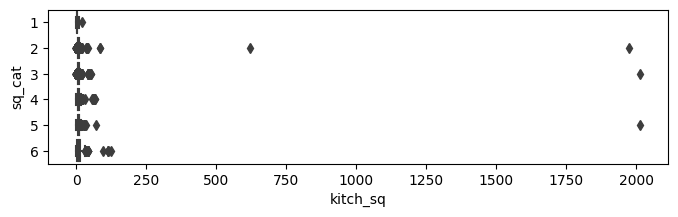

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=proc_data, x='kitch_sq', y='sq_cat')

<Axes: xlabel='full_sq', ylabel='kitch_sq'>

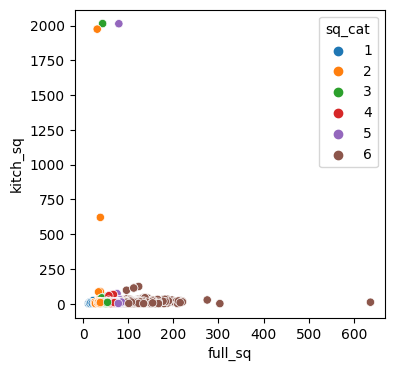

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=proc_data, x='full_sq', y='kitch_sq', hue='sq_cat')

Очевидно, что площадь кухни не может быть больше, равна, или даже примерно равняться общей площади квартиры, поэтому в таких ситуациях переоценим площадь кухни как среднюю площадь кухни из квартир соответствующей категории, где площадь кухни строго меньше общей площади. Также примим, что площадь кухни не может быть = 0.

In [ ]:
def create_dict_with_avg_kitch_sq(data):
  non_fict_deal_condition = data['fict_deal'] == 0
  sq_condition = data['kitch_sq']/data['full_sq'] < 0.5 # отсекаем случаи, когда площадь кухни меньше, но почти
                                                        # равна общей площади, что не логично
  sq_kitch_condition = data['kitch_sq'] > 0

  avg_kitch_sq_dict = round(data[non_fict_deal_condition & sq_condition & sq_kitch_condition].groupby('sq_cat')['kitch_sq'].mean())
  avg_kitch_sq_dict.name = 'avg_kitch_in_sq_cat'

  print(avg_kitch_sq_dict)

  return avg_kitch_sq_dict

def correct_kitch_sq(data, dict):
  non_fict_deal_condition = data['fict_deal'] == 0
  sq_condition = data['kitch_sq']/data['full_sq'] > 0.5
  sq_kitch_condition = data['kitch_sq'] > 0

  data = data.drop(columns='avg_kitch_in_sq_cat', errors='ignore')
  data = pd.merge(left=data, right=dict, on='sq_cat', how='left')

  data['kitch_sq'] = data['kitch_sq'].mask(non_fict_deal_condition & sq_condition & sq_kitch_condition, data['avg_kitch_in_sq_cat'])

  return data

In [ ]:
avg_kitch_sq_dict = create_dict_with_avg_kitch_sq(proc_data)

proc_data = correct_kitch_sq(proc_data, avg_kitch_sq_dict)
proc_sub = correct_kitch_sq(proc_sub, avg_kitch_sq_dict)

sq_cat
1     3.0
2     6.0
3     6.0
4     7.0
5     8.0
6    10.0
Name: avg_kitch_in_sq_cat, dtype: float64


Получилось:

<Axes: xlabel='full_sq', ylabel='kitch_sq'>

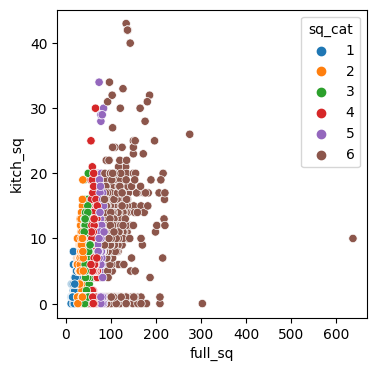

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=proc_data, x='full_sq', y='kitch_sq', hue='sq_cat')

Теперь найдем среднюю разницу между общими площадями и площадью кухни и жилых помещений, и с помощью нее расчитаем новые оценки для жилых площадей:

In [ ]:
def create_dict_with_avg_sq_diff(data):
  non_fict_deal_condition = data['fict_deal'] == 0
  sq_condition = data['life_sq']/data['full_sq'] > 0.2 # учтем, что жилая площадь не должна быть совсем маленькой
  sq_kitch_condition = data['kitch_sq'] > 0

  avg_life_sq = data[non_fict_deal_condition & sq_condition].groupby('sq_cat')['life_sq'].mean()
  avg_kitch_sq = data[non_fict_deal_condition & sq_kitch_condition].groupby('sq_cat')['kitch_sq'].mean()
  avg_full_sq = data[non_fict_deal_condition].groupby('sq_cat')['full_sq'].mean()

  avg_diff_in_sq_dict = round(avg_full_sq - (avg_life_sq + avg_kitch_sq))
  avg_diff_in_sq_dict.name = 'avg_diff_in_sq_cat'

  print(avg_diff_in_sq_dict)

  return avg_diff_in_sq_dict

def correct_life_sq(data, dict):
  data = data.drop(columns='avg_diff_in_sq_cat', errors='ignore')
  data = pd.merge(left=data, right=dict, on='sq_cat', how='left')

  non_fict_deal_condition = data['fict_deal'] == 0
  sq_condition = data['life_sq'] >= data['full_sq']
  solution = data['full_sq'] - (data['kitch_sq'] + data['avg_diff_in_sq_cat'])

  data['life_sq'] = data['life_sq'].mask(sq_condition & non_fict_deal_condition, solution)

  return data

In [ ]:
avg_diff_in_sq_dict = create_dict_with_avg_sq_diff(proc_data)

proc_data = correct_life_sq(proc_data, avg_diff_in_sq_dict)
proc_sub = correct_life_sq(proc_sub, avg_diff_in_sq_dict)

sq_cat
1     4.0
2     8.0
3    11.0
4    13.0
5    17.0
6    25.0
Name: avg_diff_in_sq_cat, dtype: float64


Получилось:

<Axes: xlabel='full_sq', ylabel='life_sq'>

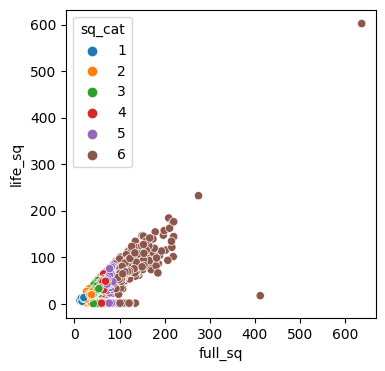

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=proc_data, x='full_sq', y='life_sq', hue='sq_cat')

Посмотрим на случаи, когда площадь кухни = 0, 1 или nan:

In [ ]:
proc_data[(proc_data['kitch_sq'].isin([0, 1])) | (proc_data['kitch_sq'].isna())].sample(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat
10396,5680,2013-01-17,40.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,17790,Poselenie Vnukovskoe,3463160,55485.2,14289.40,45.20,40.25,32.84,76.37,0,2,6.0,8.0
8243,7278,2013-04-12,64.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,21155,Mitino,7768459,55485.2,14739.33,47.09,41.30,32.61,76.37,0,4,7.0,13.0
3864,23435,2014-10-10,61.0,NaN,3.0,1.0,22.0,1.0,0.0,2.0,0.0,17790,Poselenie Vnukovskoe,7154065,61208.0,16269.79,52.82,43.85,35.37,76.70,0,4,7.0,13.0
9545,26425,2014-12-15,62.0,59.0,6.0,2.0,25.0,1.0,2015.0,2.0,1.0,247469,Nekrasovka,6552000,61208.0,16910.54,49.89,42.64,34.33,76.70,0,4,7.0,13.0
10444,136,2011-10-17,32.0,20.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,142243,Lefortovo,4700000,44898.7,12922.97,43.46,38.10,31.11,75.79,0,2,6.0,8.0


Заменим в таких случаях площадь кухни на среднуюю площадь кухни в соответствующей категории:

In [ ]:
def kitch_sq_zero_to_avg(data):
  condition = ((data['kitch_sq'].isin([0, 1])) | (data['kitch_sq'].isna())) & (data['fict_deal'] == 0)

  data['kitch_sq'] = data['kitch_sq'].mask(condition, data['avg_kitch_in_sq_cat'])

  return data

In [ ]:
proc_data = kitch_sq_zero_to_avg(proc_data)
proc_sub = kitch_sq_zero_to_avg(proc_sub)

Также посмотрим на случаи, когда жилая площадь равна 0, nan, либо сильно меньше общей площади, например, всего несколько кв.м, при большой общей площади. Логика подсказывает, что это невозможно:

In [ ]:
proc_data[(proc_data['life_sq'] == 0) | (proc_data['life_sq'].isna()) | (proc_data['life_sq']/proc_data['full_sq'] <= 0.2)].sample(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat
9163,22161,2014-09-03,63.0,0.0,14.0,1.0,17.0,1.0,0.0,2.0,7.0,17790,Poselenie Vnukovskoe,7047839,61208.0,16165.30,51.41,43.26,34.52,76.70,0,4,7.0,13.0
13898,7937,2013-05-15,41.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,6.0,7341,Poselenie Moskovskij,3738624,55485.2,14983.92,47.35,40.77,2.31,76.37,0,3,6.0,11.0
10137,25462,2014-11-28,37.0,0.0,8.0,1.0,0.0,1.0,2015.0,1.0,6.0,39873,Poselenie Shherbinka,3813204,61208.0,16648.70,53.21,43.23,34.30,76.70,0,2,6.0,8.0
671,4248,2012-10-17,48.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,6.0,13890,Poselenie Sosenskoe,4008900,48830.4,13807.34,47.19,41.19,32.69,75.74,0,3,6.0,11.0
13847,30254,2015-06-13,39.0,1.0,13.0,1.0,17.0,1.0,2015.0,1.0,6.0,125111,Solncevo,4583565,64310.0,18720.65,49.01,38.91,30.29,76.77,0,2,6.0,8.0


Заменим в таких случаях жилую площадь на общую площадь - (кухонная площадь + площадь других помещеий):

In [ ]:
def life_sq_zero_to_avg(data):
  condition = ((data['life_sq'] == 0) | (data['life_sq'].isna()) | (proc_data['life_sq']/proc_data['full_sq'] <= 0.2)) & (data['fict_deal'] == 0)
  solution = data['full_sq'] - (data['avg_kitch_in_sq_cat'] + data['avg_diff_in_sq_cat'])

  data['life_sq'] = data['life_sq'].mask(condition, solution)

  return data

In [ ]:
proc_data = life_sq_zero_to_avg(proc_data)
proc_sub = life_sq_zero_to_avg(proc_sub)

Проверим, что после всех манипуляций не осталось случаев, где сумма жилой площади и площади кухни превышает общую площадь:

<Axes: xlabel='full_sq'>

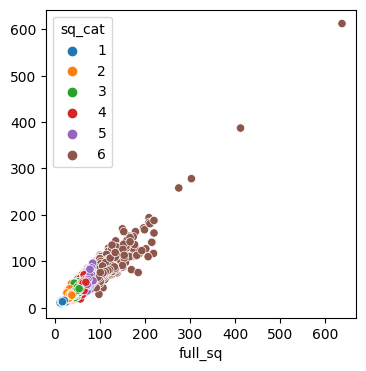

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=proc_data, x='full_sq', y=proc_data['life_sq'] + proc_data['kitch_sq'], hue='sq_cat')

Посмотрим на эти случаи:

In [ ]:
proc_data[proc_data['full_sq'] < proc_data['life_sq'] + proc_data['kitch_sq']].sample(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat
5777,23267,2014-10-04,61.0,58.0,11.0,1.0,17.0,1.0,2014.0,2.0,7.0,247469,Nekrasovka,6344800,61208.0,16269.79,52.82,43.85,35.37,76.70,0,4,7.0,13.0
5626,29770,2015-05-18,81.0,77.0,7.0,1.0,10.0,2.0,2018.0,2.0,10.0,102590,Danilovskoe,18800000,64310.0,18745.28,50.42,39.16,31.09,76.77,0,5,8.0,17.0
7093,12072,2013-11-12,71.0,68.0,15.0,4.0,19.0,4.0,2002.0,2.0,9.0,155427,Horoshevo-Mnevniki,18000000,55485.2,15367.58,49.29,42.02,34.55,76.37,0,5,8.0,17.0
8794,24881,2014-11-18,100.0,95.0,22.0,1.0,25.0,1.0,2016.0,4.0,10.0,21155,Mitino,15365994,61208.0,16648.70,53.21,43.23,34.30,76.70,0,6,10.0,25.0
10217,22945,2014-09-26,52.0,50.0,5.0,1.0,17.0,6.0,2015.0,2.0,6.0,2942,Poselenie Filimonkovskoe,3886607,61208.0,16165.30,51.41,43.26,34.52,76.70,0,3,6.0,11.0


Часто жилая площадь совсем немного меньше общей площади, что кажется логически неверным. Переоценим жилую площадь как в прошлый раз: жилая площадь = общая площадь - (кухня + средняя площадь всех остальных помещений):

In [ ]:
def correct_life_sq_when_sum_over(data, dict):
  condition = data['full_sq'] <= (data['life_sq'] + data['kitch_sq'])
  solution = data['full_sq'] - (data['kitch_sq'] + data['avg_diff_in_sq_cat'])

  data['life_sq'] = data['life_sq'].mask(condition, solution)

  return data

In [ ]:
print(avg_diff_in_sq_dict)

proc_data = correct_life_sq_when_sum_over(proc_data, avg_diff_in_sq_dict)
proc_sub = correct_life_sq_when_sum_over(proc_sub, avg_diff_in_sq_dict)

sq_cat
1     4.0
2     8.0
3    11.0
4    13.0
5    17.0
6    25.0
Name: avg_diff_in_sq_cat, dtype: float64


Получилось:

<Axes: xlabel='full_sq'>

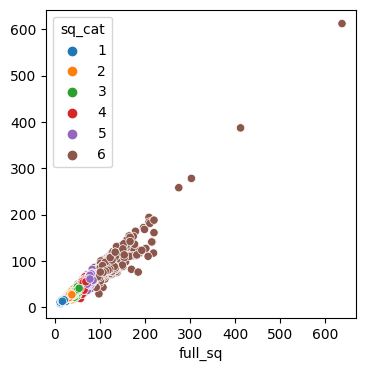

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=proc_data, x='full_sq', y=proc_data['life_sq'] + proc_data['kitch_sq'], hue='sq_cat')

Также остались строки из числа фиктивных сделок, где нет данных о жилой или кухонной площади, или они равны 0:

In [ ]:
proc_data[(proc_data['life_sq'].isna()) | (proc_data['life_sq'] == 0) | (proc_data['kitch_sq'].isna()) | (proc_data['kitch_sq'] == 0)].sample()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat
14710,26928,2014-12-20,1.0,NaN,17.0,1.0,1.0,1.0,1.0,1.0,1.0,21819,Poselenie Desjonovskoe,3793778,61208.0,16910.54,49.89,42.64,34.33,76.7,1,NaN,NaN,NaN


Заменим неизвестные данные в них на 1:

In [ ]:
def push_nan_to_one_in_fict_deals(data):
  life_sq_na_cond = data['life_sq'].isna()
  kitch_sq_na_cond = data['kitch_sq'].isna()
  life_sq_zero_cond = data['life_sq'] == 0
  kitch_zero_sq_zero_cond = data['kitch_sq'] == 0

  data['life_sq'] = data['life_sq'].mask((life_sq_na_cond | life_sq_zero_cond) & data['fict_deal'] == 1, 1)
  data['kitch_sq'] = data['kitch_sq'].mask((kitch_sq_na_cond | kitch_zero_sq_zero_cond) & data['fict_deal'] == 1, 1)

  return data

In [ ]:
proc_data = push_nan_to_one_in_fict_deals(proc_data)
proc_sub = push_nan_to_one_in_fict_deals(proc_sub)

Теперь, когда все площади должны быть отредактированы, окончательно посмотрим на результаты:

<Axes: xlabel='full_sq', ylabel='sq_cat'>

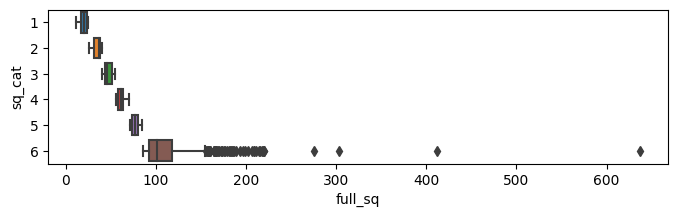

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=proc_data, x='full_sq', y='sq_cat')

<Axes: xlabel='life_sq', ylabel='sq_cat'>

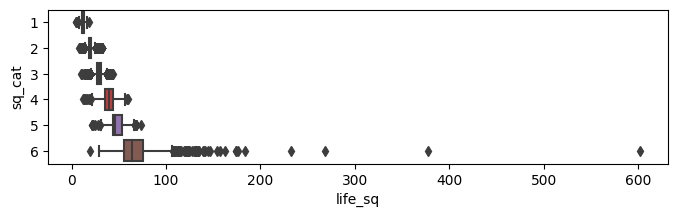

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=proc_data, x='life_sq', y='sq_cat')

<Axes: xlabel='kitch_sq', ylabel='sq_cat'>

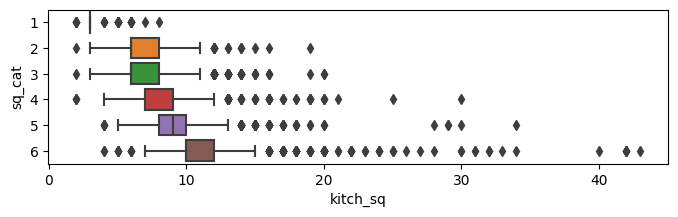

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=proc_data, x='kitch_sq', y='sq_cat')

In [ ]:
proc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15092 entries, 0 to 15091
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    15092 non-null  int64   
 1   timestamp             15092 non-null  object  
 2   full_sq               15092 non-null  float64 
 3   life_sq               15092 non-null  float64 
 4   floor                 15069 non-null  float64 
 5   state                 12366 non-null  float64 
 6   max_floor             13938 non-null  float64 
 7   material              13938 non-null  float64 
 8   build_year            13474 non-null  float64 
 9   num_room              13938 non-null  float64 
 10  kitch_sq              15092 non-null  float64 
 11  full_all              15092 non-null  int64   
 12  sub_area              15092 non-null  object  
 13  price_doc             15092 non-null  int64   
 14  salary                15092 non-null  float64 
 15  fi

###1.5.2 Год постройки `build_year`, материал `material`

<Axes: xlabel='build_year'>

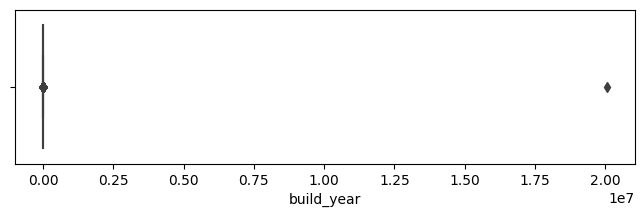

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=proc_data['build_year'])

In [ ]:
proc_data['build_year'].sort_values().unique().astype('int')

array([                   0,                    1,                    3,
                         20,                   71,                  215,
                       1691,                 1860,                 1876,
                       1890,                 1895,                 1896,
                       1900,                 1904,                 1907,
                       1910,                 1911,                 1912,
                       1914,                 1915,                 1917,
                       1920,                 1924,                 1925,
                       1926,                 1927,                 1928,
                       1929,                 1930,                 1931,
                       1932,                 1933,                 1934,
                       1935,                 1936,                 1937,
                       1938,                 1939,                 1940,
                       1941,                 1943, 

Экстремальные случаи:

In [ ]:
proc_data[(proc_data['build_year'] < 1600) | (proc_data['build_year'] > datetime.today().year)].sample(5)
                                                                        # условимся, что дата продажи может быть раньше даты постройки, если это новостройка

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat
8839,29210,2015-04-17,71.0,46.0,5.0,NaN,18.0,4.0,0.0,2.0,8.0,111023,Ochakovo-Matveevskoe,8631485,64310.0,18642.71,50.36,39.92,31.41,76.77,0,5,8.0,17.0
11592,30428,2015-06-25,64.0,44.0,13.0,1.0,17.0,1.0,0.0,2.0,7.0,125111,Solncevo,6418251,64310.0,18720.65,49.01,38.91,30.29,76.77,0,4,7.0,13.0
10560,26698,2014-12-17,40.0,31.0,3.0,1.0,17.0,1.0,0.0,1.0,6.0,116742,Tverskoe,5591476,61208.0,16910.54,49.89,42.64,34.33,76.70,0,2,6.0,8.0
9750,25734,2014-12-03,34.0,26.0,6.0,1.0,17.0,1.0,0.0,1.0,6.0,21819,Poselenie Desjonovskoe,3505109,61208.0,16910.54,49.89,42.64,34.33,76.70,0,2,6.0,8.0
10554,19155,2014-05-30,78.0,53.0,3.0,1.0,1.0,1.0,1.0,3.0,8.0,221709,Krjukovo,7643600,61208.0,16205.25,50.24,41.17,32.87,76.70,0,5,8.0,17.0


Явно видно, что некоторые выбросы можно восстановить в ручную. Например, 20052009 представляет дом либо 2005, либо 2009 года постройки, но нужно выработать более универсальные правила, чтобы иметь возможность обрабатывать любые поступающие данные.

Посмотрим как соотносится материал и год постройки:

<Axes: xlabel='build_year', ylabel='Count'>

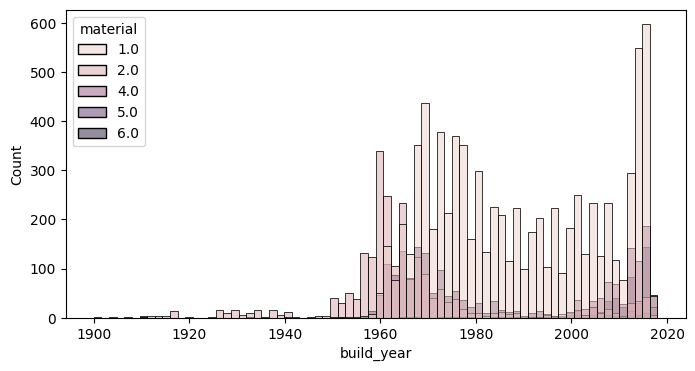

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=proc_data[proc_data['build_year'].between(1900, datetime.today().year)], x='build_year', bins=74, hue='material')

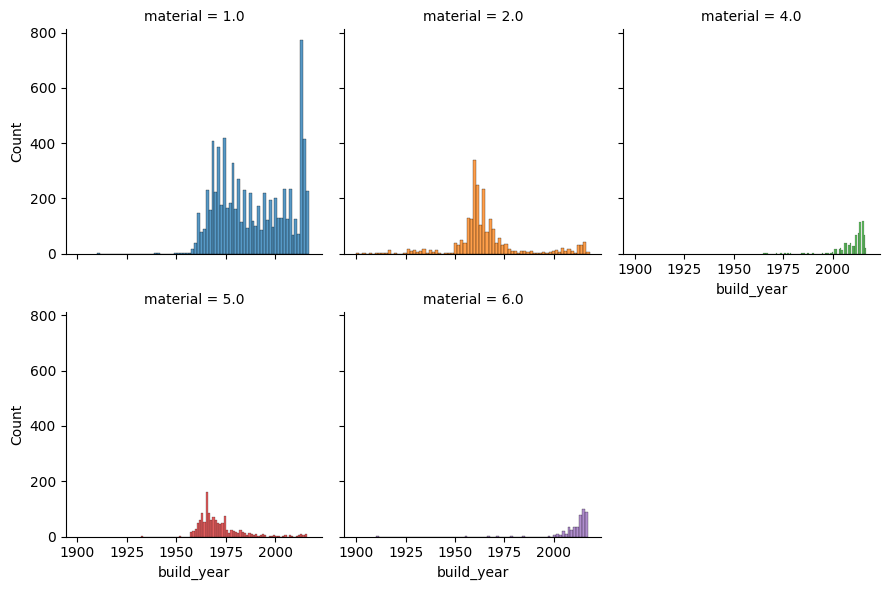

In [ ]:
g = sns.FacetGrid(data=proc_data[proc_data['build_year'].between(1900, datetime.today().year)], col='material', hue='material', col_wrap=3)
g.map(sns.histplot, 'build_year', bins=74)

Видно, что зная материал можно уже достаточно точно определить дату постройки дома, кроме домов с 1 материалом.

Помним, что для материала №3 есть только одна запись в train данных, и нет записей в test. Заменим это значение на nan, а, позже заполним по общим правилам:

In [ ]:
def change_third_material_to_nan(data):
  data['material'] = data['material'].mask(data['material'] == 3)

  return data

In [ ]:
proc_data = change_third_material_to_nan(proc_data)
proc_sub = change_third_material_to_nan(proc_sub)

Посмотрим, можно ли точнее определить период постройки дома, если добавить к анализу этажность здания:

<Figure size 800x400 with 0 Axes>

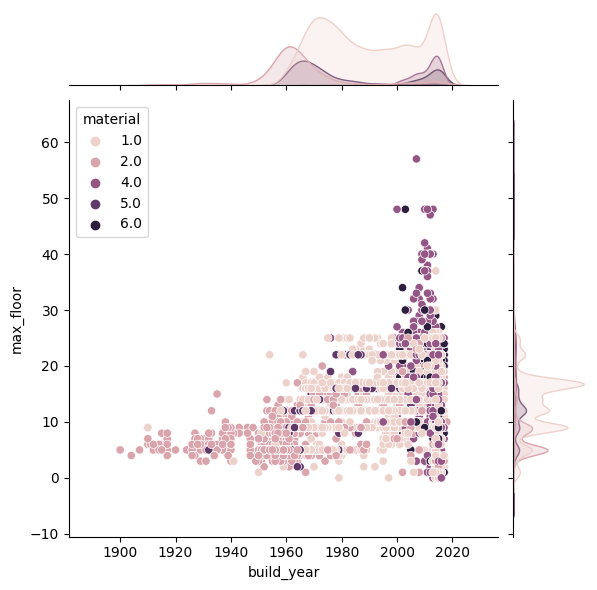

In [ ]:
plt.figure(figsize=(8, 4))
sns.jointplot(data=proc_data[proc_data['build_year'].between(1900, datetime.today().year)], x='build_year', y='max_floor', hue='material')

In [ ]:
first_build_year_condition = proc_data['build_year'].between(1960, 1980)
second_build_year_condition = proc_data['build_year'].between(1980, 1991)
third_build_year_condition = proc_data['build_year'].between(1991, datetime.today().year)
not_zero_condition = proc_data['max_floor'] > 0
material_condition = proc_data['material'] == 1

Посмотрим по этим периодам:

<Axes: xlabel='max_floor', ylabel='Count'>

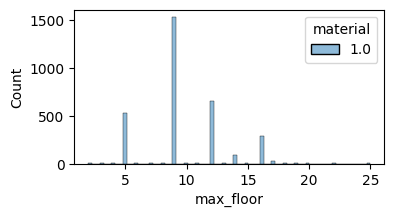

In [ ]:
plt.figure(figsize=(4, 2))
sns.histplot(data=proc_data[material_condition & not_zero_condition & first_build_year_condition], x='max_floor', hue='material', bins=74)

<Axes: xlabel='max_floor', ylabel='Count'>

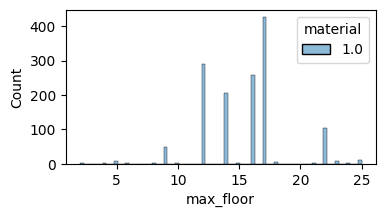

In [ ]:
plt.figure(figsize=(4, 2))
sns.histplot(data=proc_data[material_condition & not_zero_condition & second_build_year_condition], x='max_floor', hue='material', bins=74)

<Axes: xlabel='max_floor', ylabel='Count'>

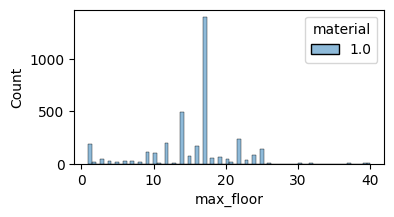

In [ ]:
plt.figure(figsize=(4, 2))
sns.histplot(data=proc_data[material_condition & not_zero_condition & third_build_year_condition], x='max_floor', hue='material', bins=74)

Видно, что если использовался материал №1, и в доме меньше 12 этажей, то почти наверняка это дом 1960-1980 годов постройки. Если больше, то 1980-н.в. Для остальных случев материал сам по себе хорошо позволяет определить период постройки. Можно использовать эту связь как для обогащения данных по дате постройки, так и для данных о материалах:

In [ ]:
def find_build_year_by_material(data, dict_data):
  main_condition = ((data['build_year'] < 1600) | (data['build_year'] > datetime.today().year) | (data['build_year'].isna()))
  first_mat_condition = dict_data['material'] == 1
  second_mat_condition = dict_data['material'] == 2
  fourth_mat_condition = dict_data['material'] == 4
  fifth_mat_condition = dict_data['material'] == 5
  sixth_mat_condition = dict_data['material'] == 6

  median_build_year_first_mat_first_per = dict_data[(first_mat_condition) & (dict_data['build_year'].between(1960, 1980))]['build_year'].median()
  median_build_year_first_mat_second_per = dict_data[(first_mat_condition) & (dict_data['build_year'].between(1980, datetime.today().year))]['build_year'].median()
  median_build_year_second_mat = dict_data[second_mat_condition]['build_year'].median()
  median_build_year_fourth_mat = dict_data[fourth_mat_condition]['build_year'].median()
  median_build_year_fifth_mat = dict_data[fifth_mat_condition]['build_year'].median()
  median_build_year_sixth_mat = dict_data[sixth_mat_condition]['build_year'].median()

  data['build_year'] = data['build_year'].mask((main_condition & (data['material'] == 1) & (data['max_floor'] <= 12)), median_build_year_first_mat_first_per)
  data['build_year'] = data['build_year'].mask((main_condition & (data['material'] == 1) & (data['max_floor'] > 12)), median_build_year_first_mat_second_per)
  data['build_year'] = data['build_year'].mask((main_condition & (data['material'] == 2)), median_build_year_second_mat)
  data['build_year'] = data['build_year'].mask((main_condition & (data['material'] == 4)), median_build_year_fourth_mat)
  data['build_year'] = data['build_year'].mask((main_condition & (data['material'] == 5)), median_build_year_fifth_mat)
  data['build_year'] = data['build_year'].mask((main_condition & (data['material'] == 6)), median_build_year_sixth_mat)

  return data

In [ ]:
proc_data = find_build_year_by_material(proc_data, proc_data)
proc_sub = find_build_year_by_material(proc_sub, proc_data)

Получили:

<Axes: xlabel='build_year'>

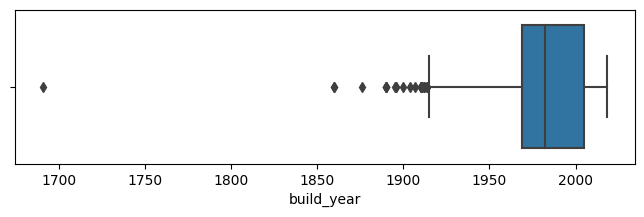

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=proc_data['build_year'])

Теперь заполним данными ситуации, когда неизвестен ни год постройки, ни материал. Для этого предположим, что застройка районов происходит более-менее в одно время, а значит медианные даты постройки домов в каждом районе можно использвать для заполнения пропусков для домов в соответствующих районах:

In [ ]:
def create_median_build_year_in_sub_area_dict(data):
  dict = proc_data.groupby('sub_area')['build_year'].median()
  dict.name = 'median_build_year_in_sub_area_dict'

  print(dict)

  return dict

def find_build_year_by_sub_area(data, dict):
  data = data.drop(columns='median_build_year_in_sub_area_dict', errors='ignore')
  data = pd.merge(left=data, right=dict, on='sub_area', how='left')

  condition = ((data['build_year'].isna()) & (data['material'].isna()))
  data['build_year'] = data['build_year'].mask(condition, data['median_build_year_in_sub_area_dict'])

  return data

In [ ]:
median_build_year_in_sub_area_dict = create_median_build_year_in_sub_area_dict(data)

proc_data = find_build_year_by_sub_area(proc_data, median_build_year_in_sub_area_dict)
proc_sub = find_build_year_by_sub_area(proc_sub, median_build_year_in_sub_area_dict)

sub_area
Ajeroport            1961.0
Akademicheskoe       1970.0
Alekseevskoe         1964.0
Altuf'evskoe         1977.0
Arbat                1960.5
                      ...  
Vyhino-Zhulebino     1983.0
Zamoskvorech'e       1963.0
Zapadnoe Degunino    1998.0
Zjablikovo           1977.0
Zjuzino              1966.0
Name: median_build_year_in_sub_area_dict, Length: 146, dtype: float64


Теперь обогатим данные по материалам, если известен год постройки. Материал №1 достаточно универсален, и чаще всех других использовался после 1960 г. Поэтому сделаем материалом зданий, попадающих в этот период материал №1. Для сданий, постренных ранее проставим материал №2 - он, во-первых, использовался в эти периоды чаще всего, и, во-вторых, использовася во все времена до 1960-х.:

In [ ]:
def find_material_by_build_year(data):
  main_condition = ((data['material'].isna()) & (data['build_year'].notna()))

  data['material'] = data['material'].mask((main_condition & (data['build_year'] >= 1960)), 1)
  data['material'] = data['material'].mask((main_condition & (data['build_year'] < 1960)), 2)

  return data

In [ ]:
proc_data = find_material_by_build_year(proc_data)
proc_sub = find_material_by_build_year(proc_sub)

In [ ]:
proc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15092 entries, 0 to 15091
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   id                                  15092 non-null  int64   
 1   timestamp                           15092 non-null  object  
 2   full_sq                             15092 non-null  float64 
 3   life_sq                             15092 non-null  float64 
 4   floor                               15069 non-null  float64 
 5   state                               12366 non-null  float64 
 6   max_floor                           13938 non-null  float64 
 7   material                            15092 non-null  float64 
 8   build_year                          15092 non-null  float64 
 9   num_room                            13938 non-null  float64 
 10  kitch_sq                            15092 non-null  float64 
 11  full_all                    

### 1.5.3 Этажность здания `max_floor` и этаж квартиры `floor`

Посмотрим на максимальный этаж в сравнении с годом постройки:

<Figure size 800x400 with 0 Axes>

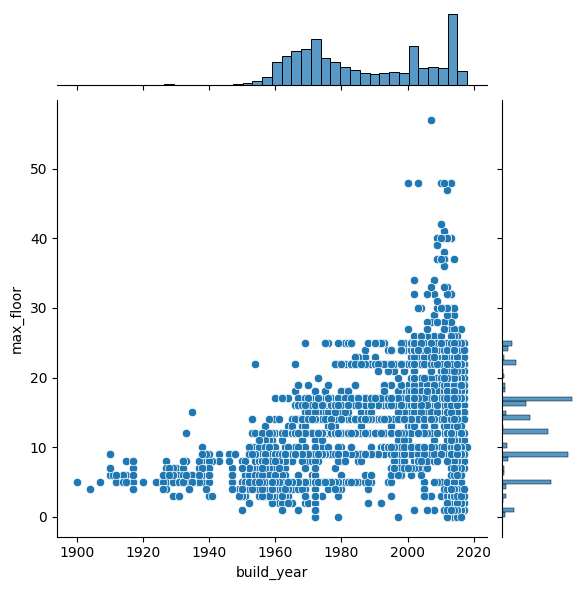

In [ ]:
plt.figure(figsize=(8, 4))
sns.jointplot(data=proc_data[proc_data['build_year'].between(1900, datetime.today().year)], x='build_year', y='max_floor')

Видно, что есть зависимость, которую можно использовать.

Посмотрим на случаи, когда этаж квартиры больше максимального этажа:

In [ ]:
proc_data[proc_data['floor'] > proc_data['max_floor']].sample(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat,median_build_year_in_sub_area_dict
4603,11249,2013-10-15,48.0,31.0,20.0,1.0,1.0,1.0,2013.0,1.0,6.0,247469,Nekrasovka,4986770,55485.2,15285.65,48.28,41.96,34.52,76.37,0,3,6.0,11.0,2013.0
3005,23350,2014-10-07,60.0,30.0,16.0,1.0,1.0,1.0,2015.0,2.0,7.0,9553,Poselenie Voskresenskoe,6570520,61208.0,16269.79,52.82,43.85,35.37,76.70,0,4,7.0,13.0,2014.0
11566,28125,2015-02-27,42.0,25.0,21.0,1.0,1.0,1.0,2015.0,1.0,6.0,79576,Losinoostrovskoe,7497000,64310.0,18295.07,51.49,41.86,34.35,76.77,0,3,6.0,11.0,1972.0
4226,18767,2014-05-22,72.0,47.0,10.0,2.0,0.0,2.0,2016.0,2.0,8.0,7341,Poselenie Moskovskij,7731241,61208.0,16205.25,50.24,41.17,32.87,76.70,0,5,8.0,17.0,2008.0
12820,10348,2013-09-09,83.0,41.0,4.0,1.0,1.0,4.0,2011.0,2.0,16.0,76670,Zjuzino,17516236,55485.2,15215.84,49.12,42.10,34.53,76.37,0,5,8.0,17.0,1966.0


Видно, что максимальная этажность часто равна 1 или 0, при том, что этаж квартиры определен. В таких случаях установим этаж квартиры максимальным этажом дома, если он больше медианного значения максимального этажа домов соответствующего временного периода. В противном случае медианный максимальный этаж будет максимальным этажом.

Для этого разобъем годы постройки на несколько категорий:

In [ ]:
def create_build_year_cat(data):
  data['build_year_cat'] = pd.cut(data['build_year'], [0, 1917, 1935, 1960, 1980, 2000, datetime.today().year] \
                                       , labels=['1', '2', '3', '4', '5', '6']) #разбивка на категории по историческим периодам

  return data

In [ ]:
proc_data = create_build_year_cat(proc_data)
proc_sub = create_build_year_cat(proc_sub)

<Figure size 800x400 with 0 Axes>

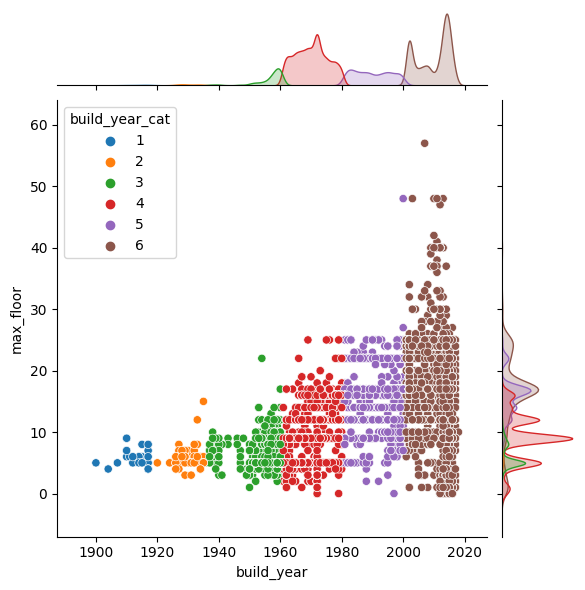

In [ ]:
plt.figure(figsize=(8, 4))
sns.jointplot(data=proc_data[proc_data['build_year'].between(1900, datetime.today().year)], x='build_year', y='max_floor', hue='build_year_cat')

Теперь найдем среднюю этажность домов в каждом периоде и дополним недостающие данные по описанному выше правилу:

In [ ]:
def create_median_max_floor_in_cat_dict(data):
  dict = data[data['max_floor'] > 0].groupby('build_year_cat')['max_floor'].median() # учтем, что меньше 1 этажность быть не может
  dict.name = 'median_max_floor_in_cat'

  print(dict)

  return dict

def find_max_floor(data, dict):
  data = data.drop(columns='median_max_floor_in_cat', errors='ignore')
  data = pd.merge(left=data, right=dict, on='build_year_cat', how='left')

  condition_by_floor = (data['floor'] > data['max_floor']) & (data['max_floor'] < data['median_max_floor_in_cat'])
  condition_max_floor_nan = data['max_floor'].isna()
  condition_max_floor_zero = data['max_floor'] == 0

  data['max_floor'] = data['max_floor'].mask(((condition_by_floor | condition_max_floor_nan) & (data['floor'] >= data['median_max_floor_in_cat'])) \
                                             , data['floor'])
  data['max_floor'] = data['max_floor'].mask(((condition_by_floor | condition_max_floor_nan) & (data['floor'] < data['median_max_floor_in_cat'])) \
                                             , data['median_max_floor_in_cat'])
  data['max_floor'] = data['max_floor'].mask(((condition_max_floor_nan) | (condition_max_floor_zero)) & ((data['floor'].isna()) | (data['floor'] == 0)) \
                                             , data['median_max_floor_in_cat'])

  return data

In [ ]:
median_max_floor_in_cat_dict = create_median_max_floor_in_cat_dict(proc_data)

proc_data = find_max_floor(proc_data, median_max_floor_in_cat_dict)
proc_sub = find_max_floor(proc_sub, median_max_floor_in_cat_dict)

build_year_cat
1     5.0
2     5.0
3     5.0
4     9.0
5    16.0
6    17.0
Name: median_max_floor_in_cat, dtype: float64


Получилось:

<Figure size 800x400 with 0 Axes>

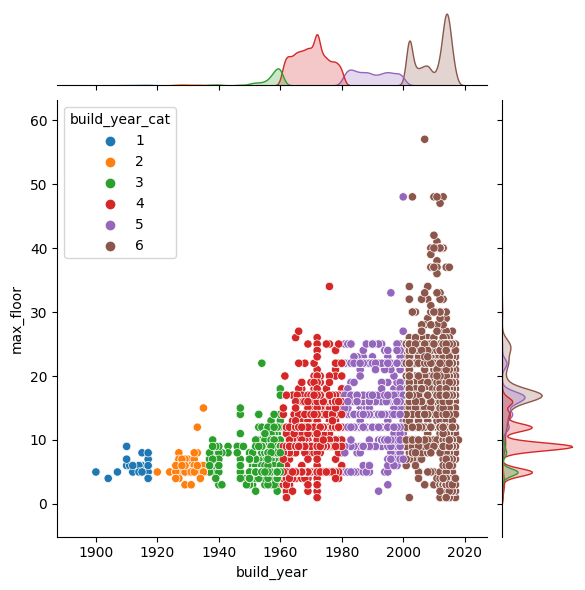

In [ ]:
plt.figure(figsize=(8, 4))
sns.jointplot(data=proc_data[proc_data['build_year'].between(1900, datetime.today().year)], x='build_year', y='max_floor', hue='build_year_cat')

In [ ]:
proc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15092 entries, 0 to 15091
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   id                                  15092 non-null  int64   
 1   timestamp                           15092 non-null  object  
 2   full_sq                             15092 non-null  float64 
 3   life_sq                             15092 non-null  float64 
 4   floor                               15069 non-null  float64 
 5   state                               12366 non-null  float64 
 6   max_floor                           15092 non-null  float64 
 7   material                            15092 non-null  float64 
 8   build_year                          15092 non-null  float64 
 9   num_room                            13938 non-null  float64 
 10  kitch_sq                            15092 non-null  float64 
 11  full_all                    

Теперь обогадим данные об этаже квартиры. После последних преобразований точно остались случаи, когда этаж квартиры выше максимального этажа здания. В таком случае заменим этаж квартиры на максимальный этаж:

In [ ]:
def downgrade_floor_to_max_floor(data):
  data['floor'] = data['floor'].mask(data['floor'] > data['max_floor'], data['max_floor'])

  return data

In [ ]:
proc_data = downgrade_floor_to_max_floor(proc_data)
proc_sub = downgrade_floor_to_max_floor(proc_sub)

Теперь заполним данными случаи, когда этаж nan или равен 0. Пусть это будет средний этаж от максимального в доме:

In [ ]:
proc_data[(proc_data['floor'].isna()) | (proc_data['floor'] == 0)].sample(3)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat,median_build_year_in_sub_area_dict,build_year_cat,median_max_floor_in_cat
14161,4698,2012-11-12,45.0,28.0,NaN,NaN,9.0,1.0,1969.0,NaN,6.0,94564,Golovinskoe,6000000,48830.4,13872.82,48.97,40.83,32.93,75.74,0,3,6.0,11.0,1969.0,4,9.0
4092,8492,2013-06-13,58.0,34.0,NaN,NaN,17.0,1.0,2002.0,NaN,7.0,83844,Obruchevskoe,2000000,55485.2,15130.84,46.56,41.09,32.23,76.37,0,4,7.0,13.0,2002.0,6,17.0
12643,25427,2014-11-27,81.0,39.0,0.0,3.0,12.0,5.0,2008.0,2.0,15.0,7122,Poselenie Rjazanovskoe,7650000,61208.0,16648.70,53.21,43.23,34.30,76.70,0,5,8.0,17.0,2006.0,6,17.0


In [ ]:
def find_floor_from_max_floor(data):
  data['floor'] = data['floor'].mask(((data['floor'].isna()) | (proc_data['floor'] == 0)), round(data['max_floor']/2))

  return data

In [ ]:
proc_data = find_floor_from_max_floor(proc_data)
proc_sub = find_floor_from_max_floor(proc_sub)

In [ ]:
proc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15092 entries, 0 to 15091
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   id                                  15092 non-null  int64   
 1   timestamp                           15092 non-null  object  
 2   full_sq                             15092 non-null  float64 
 3   life_sq                             15092 non-null  float64 
 4   floor                               15092 non-null  float64 
 5   state                               12366 non-null  float64 
 6   max_floor                           15092 non-null  float64 
 7   material                            15092 non-null  float64 
 8   build_year                          15092 non-null  float64 
 9   num_room                            13938 non-null  float64 
 10  kitch_sq                            15092 non-null  float64 
 11  full_all                    

### 1.5.4 Количество комнат `num_room`

<Axes: xlabel='num_room'>

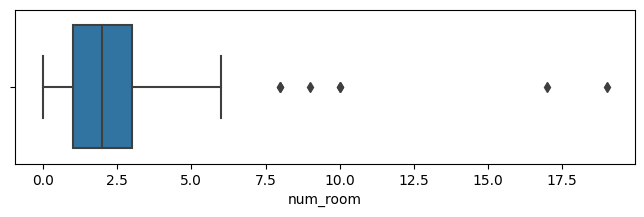

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=proc_data, x='num_room')

Количество комнат не может быть = 0, даже если имеем дело с квартирами студиями, то количество комнат = 1. Посмотрим на выбросы в большую сторону:

In [ ]:
proc_data[proc_data['num_room'] > 7].sample(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat,median_build_year_in_sub_area_dict,build_year_cat,median_max_floor_in_cat
11844,18936,2014-05-27,177.0,119.0,3.0,2.0,4.0,2.0,1890.0,8.0,17.0,28179,Basmannoe,24267600,61208.0,16205.25,50.24,41.17,32.87,76.70,0,6,10.0,25.0,1961.5,1,5.0
9873,28329,2015-03-12,220.0,144.0,3.0,3.0,5.0,2.0,1927.0,9.0,17.0,57999,Presnenskoe,95122496,64310.0,18557.88,50.41,40.49,31.35,76.77,0,6,10.0,25.0,1965.5,2,5.0
12374,21900,2014-08-26,159.0,115.0,2.0,2.0,4.0,2.0,1904.0,8.0,14.0,28179,Basmannoe,35000000,61208.0,16134.39,52.81,43.11,34.83,76.70,0,6,10.0,25.0,1961.5,1,5.0
9312,11624,2013-10-28,40.0,19.0,17.0,3.0,17.0,1.0,2011.0,19.0,7.0,17790,Poselenie Vnukovskoe,2630000,55485.2,15285.65,48.28,41.96,34.52,76.37,0,2,6.0,8.0,2002.0,6,17.0
9017,26716,2014-12-18,51.0,30.0,14.0,3.0,17.0,1.0,1984.0,17.0,8.0,83844,Obruchevskoe,13150000,61208.0,16910.54,49.89,42.64,34.33,76.70,0,3,6.0,11.0,2002.0,5,16.0


Ясно видно, что в некоторых случаях количество комнат явно завышено. Попробуем посмотреть на среднюю площадь одной комнаты для каждой квартиры:

<Axes: ylabel='sq_cat'>

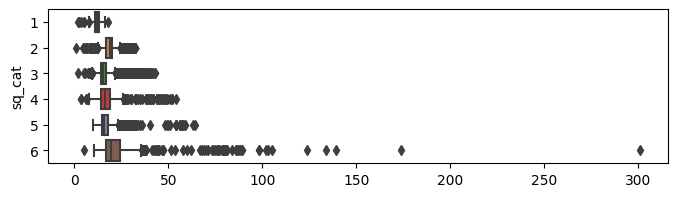

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=proc_data, x=proc_data['life_sq']/proc_data['num_room'], y='sq_cat')

<Axes: ylabel='sq_cat'>

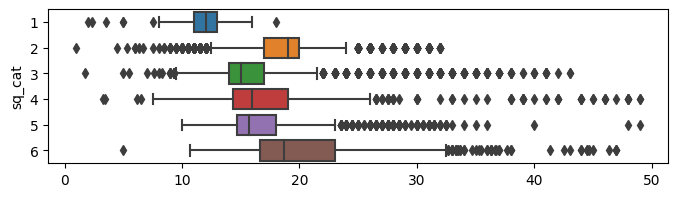

In [ ]:
plt.figure(figsize=(8, 2))
fict_deal_cond = (proc_data['fict_deal'] == 0)
sns.boxplot(data=proc_data[(proc_data['life_sq']/proc_data['num_room'] < 50) & (fict_deal_cond)], x=proc_data['life_sq']/proc_data['num_room'], y='sq_cat')

Посмотрим на экстремальные случаи:

In [ ]:
fict_deal_cond = (proc_data['fict_deal'] == 0)
proc_data[(proc_data['life_sq']/proc_data['num_room'] < 2) & (fict_deal_cond)]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat,median_build_year_in_sub_area_dict,build_year_cat,median_max_floor_in_cat
9017,26716,2014-12-18,51.0,30.0,14.0,3.0,17.0,1.0,1984.0,17.0,8.0,83844,Obruchevskoe,13150000,61208.0,16910.54,49.89,42.64,34.33,76.70,0,3,6.0,11.0,2002.0,5,16.0
9312,11624,2013-10-28,40.0,19.0,17.0,3.0,17.0,1.0,2011.0,19.0,7.0,17790,Poselenie Vnukovskoe,2630000,55485.2,15285.65,48.28,41.96,34.52,76.37,0,2,6.0,8.0,2002.0,6,17.0


In [ ]:
fict_deal_cond = (proc_data['fict_deal'] == 0)
proc_data[((proc_data['life_sq']/proc_data['num_room'] > 50) | (proc_data['num_room'] == 0) | (proc_data['num_room'].isna())) & (fict_deal_cond)].sample(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat,median_build_year_in_sub_area_dict,build_year_cat,median_max_floor_in_cat
1652,6604,2013-03-19,55.0,38.0,5.0,NaN,17.0,1.0,2014.0,NaN,6.0,13890,Poselenie Sosenskoe,5514300,55485.2,14581.91,47.56,41.96,33.07,76.37,0,3,6.0,11.0,2014.0,6,17.0
13038,7893,2013-05-14,38.0,19.0,17.0,NaN,17.0,1.0,1978.0,NaN,6.0,61396,Otradnoe,6800000,55485.2,14983.92,47.35,40.77,2.31,76.37,0,2,6.0,8.0,1978.0,4,9.0
5132,7103,2013-04-06,46.0,29.0,6.0,NaN,17.0,1.0,2014.0,NaN,6.0,13890,Poselenie Sosenskoe,4074959,55485.2,14739.33,47.09,41.30,32.61,76.37,0,3,6.0,11.0,2014.0,6,17.0
384,3783,2012-09-22,44.0,27.0,8.0,NaN,9.0,1.0,1974.0,NaN,6.0,145088,Birjulevo Zapadnoe,5600000,48830.4,13726.03,47.30,40.66,32.90,75.74,0,3,6.0,11.0,1974.0,4,9.0
2850,5481,2012-12-25,52.0,35.0,13.0,NaN,17.0,1.0,2002.0,NaN,6.0,17790,Poselenie Vnukovskoe,4288566,48830.4,13948.20,46.94,41.01,33.10,75.74,0,3,6.0,11.0,2002.0,6,17.0


В таких случаях, найдем среднее количество комнат для квартир из сответствующей категории площадей, и заменим значения:

In [ ]:
min_sq_for_rum = 2
max_sq_for_rum = 50 # условимся, что границы выбросов будут установлены так

In [ ]:
def create_dict_median_num_room_in_sq_cat(data):
  fict_deal_cond = (data['fict_deal'] == 0)
  min_condition = (data['life_sq']/data['num_room'] > min_sq_for_rum) & (fict_deal_cond)
  max_condition = ((data['life_sq']/data['num_room'] < max_sq_for_rum)) & (fict_deal_cond)
  zero_condition = data['num_room'] > 0

  dict = data[min_condition & max_condition & zero_condition].groupby('sq_cat')['num_room'].median()
  dict.name = 'median_num_room_in_sq_cat'

  print(dict)

  return dict

def find_num_room_by_median_in_sq_cat(data, dict):
  data = data.drop(columns='median_num_room_in_sq_cat', errors='ignore')
  data = pd.merge(left=data, right=dict, on='sq_cat', how='left')

  min_condition = (data['life_sq']/data['num_room'] < min_sq_for_rum)
  max_condition = ((data['life_sq']/data['num_room'] > max_sq_for_rum))
  zero_condition = (data['num_room'] == 0)
  nan_condition = (data['num_room'].isna())

  data['num_room'] = data['num_room'].mask((min_condition | max_condition | zero_condition | nan_condition), data['median_num_room_in_sq_cat'])

  return data

In [ ]:
median_num_room_in_sq_cat_dict = create_dict_median_num_room_in_sq_cat(proc_data)

proc_data = find_num_room_by_median_in_sq_cat(proc_data, median_num_room_in_sq_cat_dict)
proc_sub = find_num_room_by_median_in_sq_cat(proc_sub, median_num_room_in_sq_cat_dict)

sq_cat
1    1.0
2    1.0
3    2.0
4    2.0
5    3.0
6    3.0
Name: median_num_room_in_sq_cat, dtype: float64


Посмотрим на средние полщади одной комнаты:

<Axes: ylabel='sq_cat'>

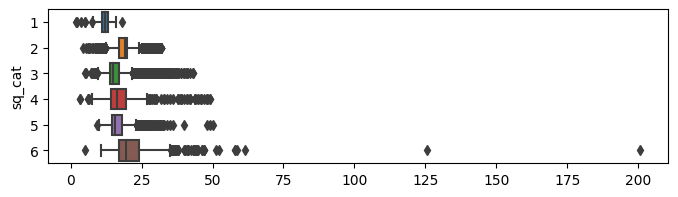

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=proc_data, x=proc_data['life_sq']/proc_data['num_room'], y='sq_cat')

И на количество комнат:

<Axes: xlabel='num_room'>

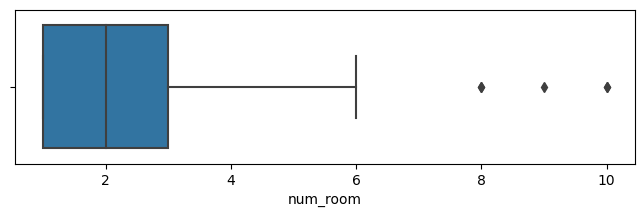

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=proc_data, x='num_room')

Посмотрим на количества комнат в фиктивных сделках:

In [ ]:
proc_data[proc_data['fict_deal'] == 1]['num_room'].unique()

array([nan])

Для фиктивных сделок определим количество комнат равным 1:

In [ ]:
def num_room_for_fict_deal(data):
  data['num_room'] = data['num_room'].mask(data['fict_deal'] == 1, 1)

  return data

In [ ]:
proc_data = num_room_for_fict_deal(proc_data)
proc_sub = num_room_for_fict_deal(proc_sub)

### 1.5.5 Жилищные условия `state`

Помним, что есть ошибка заполнения:

In [ ]:
proc_data.state.value_counts()

2.0     4671
3.0     4546
1.0     2821
4.0      327
33.0       1
Name: state, dtype: int64

Посмотрим на строки, где искомое значение отсутствует:

In [ ]:
print('Cтрок, где отсутствуют данные о жилищных условиях: ', len(proc_data[proc_data.state.isna()]))
proc_data[proc_data.state.isna()].sample(5)

Cтрок, где отсутствуют данные о жилищных условиях:  2726


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat,median_build_year_in_sub_area_dict,build_year_cat,median_max_floor_in_cat,median_num_room_in_sq_cat
13803,10246,2013-09-03,35.0,20.0,5.0,NaN,9.0,1.0,1976.0,1.0,6.0,86206,Bibirevo,5500000,55485.2,15215.84,49.12,42.10,34.53,76.37,0,2,6.0,8.0,1976.0,4,9.0,1.0
14099,24562,2014-11-11,73.0,34.0,3.0,NaN,17.0,1.0,2008.0,2.0,10.0,7341,Poselenie Moskovskij,9000000,61208.0,16648.70,53.21,43.23,34.30,76.70,0,5,8.0,17.0,2008.0,6,17.0,3.0
5819,17609,2014-04-18,46.0,34.0,6.0,NaN,24.0,4.0,2012.0,1.0,6.0,17790,Poselenie Vnukovskoe,5786481,61208.0,16041.58,49.32,40.95,32.96,76.70,0,3,6.0,11.0,2002.0,6,17.0,2.0
4181,14856,2014-02-11,34.0,17.0,1.0,NaN,5.0,2.0,1958.0,1.0,6.0,61039,Ramenki,6300000,61208.0,15730.81,49.24,41.79,33.65,76.70,0,2,6.0,8.0,1996.0,3,5.0,1.0
8599,51,2011-10-03,51.0,33.0,1.0,NaN,9.0,1.0,1968.0,2.0,6.0,145576,Caricyno,1000000,44898.7,12922.97,43.46,38.10,31.11,75.79,0,3,6.0,11.0,1968.0,4,9.0,2.0


Посмотрим, как связаны жилищные условия с другими категориальными данными:

<Figure size 400x400 with 0 Axes>

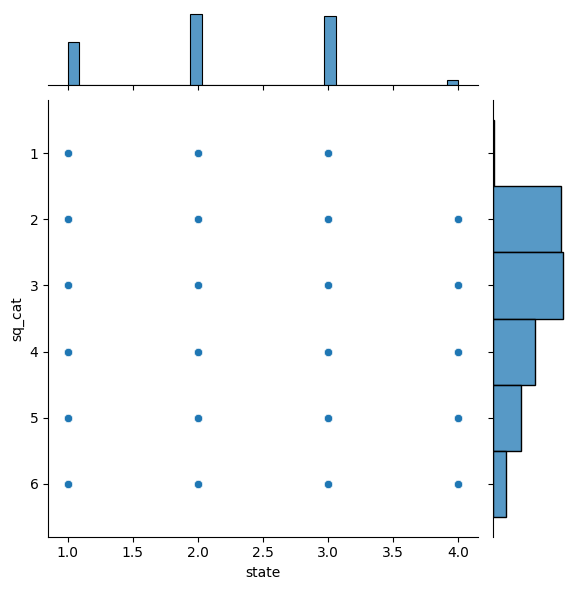

In [ ]:
plt.figure(figsize=(4, 4))
sns.jointplot(data=proc_data[proc_data['state'].between(1, 6)], x='state', y='sq_cat')

<Figure size 400x400 with 0 Axes>

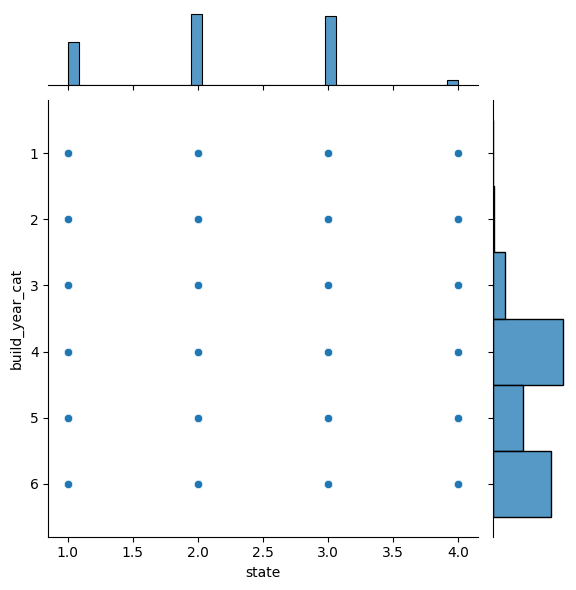

In [ ]:
plt.figure(figsize=(4, 4))
sns.jointplot(data=proc_data[proc_data['state'].between(1, 6)], x='state', y='build_year_cat')

<Figure size 400x400 with 0 Axes>

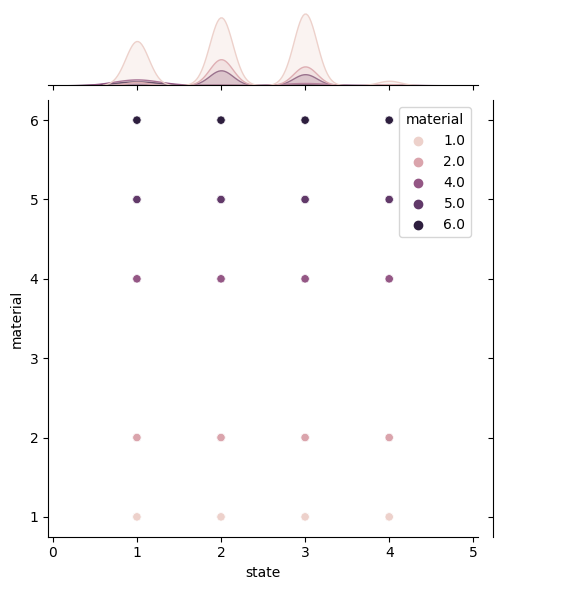

In [ ]:
plt.figure(figsize=(4, 4))
sns.jointplot(data=proc_data[proc_data['state'].between(1, 6)], x='state', y='material', hue='material')

Сложно подобрать правило, по которому можно правдоподобно оценить жилищные условия, потому что, кажется, что с другими величинами они особенно не связаны. Что, в прочем логично. Если жилищные условия описывают "качество ремонта", то это, во-первых, субъективная оценка, и, во-вторых, ремонт не зависит от других представленных условий.

Попробуем заполнить недостающие данные случайным образом. Пусть категории жилищных условий будут выпадать в соответствии с их частотой:

In [ ]:
def gen_random_states(data):
  data['state'] = data['state'].where(data['state'].between(1, 4))

  weight_one = data['state'].value_counts()[1]/data['state'].value_counts().sum()
  weight_two = data['state'].value_counts()[2]/data['state'].value_counts().sum()
  weight_three = data['state'].value_counts()[3]/data['state'].value_counts().sum()
  weight_four = data['state'].value_counts()[4]/data['state'].value_counts().sum()

  random_cat = np.random.choice(a=data[data['state'].notna()]['state'].sort_values().unique(), \
                                  size=len(data), p=[weight_one, weight_two, weight_three, weight_four])

  data['state'] = data['state'].mask(data['state'].isna(), random_cat)

  return data

In [ ]:
proc_data = gen_random_states(proc_data)
proc_sub = gen_random_states(proc_sub)

Посмотрим на получившееся количество категорий:

In [ ]:
proc_data.state.value_counts()

2.0    5683
3.0    5547
1.0    3465
4.0     397
Name: state, dtype: int64

Видно, что баланс категорий не пострадал.

Проверим, что незаполненных данных здесь не осталось:

In [ ]:
proc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15092 entries, 0 to 15091
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   id                                  15092 non-null  int64   
 1   timestamp                           15092 non-null  object  
 2   full_sq                             15092 non-null  float64 
 3   life_sq                             15092 non-null  float64 
 4   floor                               15092 non-null  float64 
 5   state                               15092 non-null  float64 
 6   max_floor                           15092 non-null  float64 
 7   material                            15092 non-null  float64 
 8   build_year                          15092 non-null  float64 
 9   num_room                            15092 non-null  float64 
 10  kitch_sq                            15092 non-null  float64 
 11  full_all                    

### 1.5.6 Стоимость аренды 2-комнатной квартиры `rent_price_2room_eco`

Помним, что существует слишком заниженная стоимость аренды:

<Axes: xlabel='rent_price_2room_eco'>

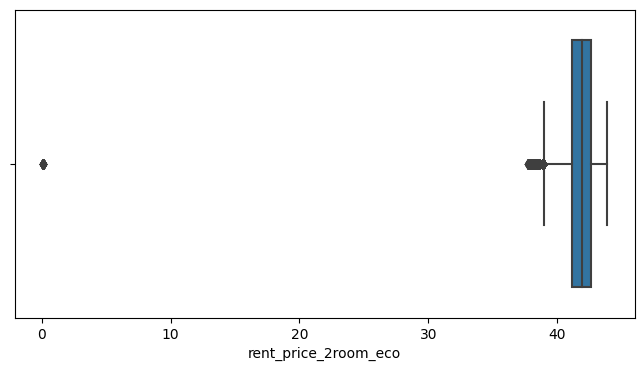

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=proc_data['rent_price_2room_eco'])

In [ ]:
selection = proc_data[proc_data['rent_price_2room_eco'] < 10]
print('Количество строк с невозможно маленькой стоимостью аренды: ', len(selection))
selection.sample(5)

Количество строк с невозможно маленькой стоимостью аренды:  35


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat,median_build_year_in_sub_area_dict,build_year_cat,median_max_floor_in_cat,median_num_room_in_sq_cat
4323,6128,2013-02-26,38.0,20.0,18.0,1.0,18.0,1.0,1960.0,1.0,6.0,64317,Lomonosovskoe,8300000,55485.2,14377.54,47.9,0.1,32.62,76.37,0,2,6.0,8.0,1960.0,3,5.0,1.0
5294,5925,2013-02-05,32.0,16.0,9.0,3.0,9.0,1.0,1969.0,1.0,6.0,94564,Golovinskoe,2130000,55485.2,14377.54,47.9,0.1,32.62,76.37,0,2,6.0,8.0,1969.0,4,9.0,1.0
4452,5988,2013-02-11,38.0,15.0,2.0,3.0,17.0,1.0,2014.0,1.0,6.0,9553,Poselenie Voskresenskoe,3404680,55485.2,14377.54,47.9,0.1,32.62,76.37,0,2,6.0,8.0,2014.0,6,17.0,1.0
6448,6073,2013-02-18,45.0,30.0,2.0,3.0,16.0,1.0,1998.0,2.0,6.0,87713,Zapadnoe Degunino,6100000,55485.2,14377.54,47.9,0.1,32.62,76.37,0,3,6.0,11.0,1998.0,5,16.0,2.0
8120,5973,2013-02-08,75.0,50.0,9.0,2.0,16.0,1.0,1999.0,3.0,8.0,21155,Mitino,9988575,55485.2,14377.54,47.9,0.1,32.62,76.37,0,5,8.0,17.0,1999.0,5,16.0,3.0


Посмотрим на даты таких случаев:

In [ ]:
selection['timestamp'].sort_values().unique()

array(['2013-02-01', '2013-02-04', '2013-02-05', '2013-02-07',
       '2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13',
       '2013-02-14', '2013-02-15', '2013-02-16', '2013-02-18',
       '2013-02-19', '2013-02-21', '2013-02-25', '2013-02-26'],
      dtype=object)

Получается, что нет данных за один конкретный месяц. Посмотрим на стоимость аренды за месяц до и после:

In [ ]:
value_month_before = proc_data[proc_data['timestamp'].str.contains('2013-01')]['rent_price_2room_eco'].mean()
value_month_after = proc_data[proc_data['timestamp'].str.contains('2013-03')]['rent_price_2room_eco'].mean()

print('Стоимость аренды за месяц до: ', value_month_before)
print('Стоимость аренды на следующий месяц: ', value_month_after)

Стоимость аренды за месяц до:  40.25
Стоимость аренды на следующий месяц:  41.96


Найдем искомую стоимость аренды как среднее между значение в прошлом и последующем месяцах:

In [ ]:
proc_data[proc_data['rent_price_2room_eco'] <= proc_data['rent_price_2room_eco'].mean()/10]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat,median_build_year_in_sub_area_dict,build_year_cat,median_max_floor_in_cat,median_num_room_in_sq_cat
853,5967,2013-02-08,28.0,12.0,5.0,3.0,9.0,1.0,1971.0,1.0,6.0,123000,Kon'kovo,5300000,55485.2,14377.54,47.9,0.1,32.62,76.37,0,2,6.0,8.0,1971.0,4,9.0,1.0
926,5860,2013-02-01,53.0,36.0,10.0,3.0,17.0,1.0,2014.0,2.0,6.0,21819,Poselenie Desjonovskoe,4323272,55485.2,14377.54,47.9,0.1,32.62,76.37,0,3,6.0,11.0,2014.0,6,17.0,2.0
1282,5905,2013-02-04,68.0,48.0,12.0,3.0,12.0,1.0,1960.0,2.0,7.0,75377,Hamovniki,5132250,55485.2,14377.54,47.9,0.1,32.62,76.37,0,4,7.0,13.0,1960.0,3,5.0,2.0
2547,5899,2013-02-04,79.0,54.0,13.0,2.0,17.0,1.0,2008.0,3.0,8.0,7341,Poselenie Moskovskij,5571245,55485.2,14377.54,47.9,0.1,32.62,76.37,0,5,8.0,17.0,2008.0,6,17.0,3.0
2577,6053,2013-02-15,42.0,25.0,5.0,4.0,17.0,1.0,2014.0,2.0,6.0,13890,Poselenie Sosenskoe,3444000,55485.2,14377.54,47.9,0.1,32.62,76.37,0,3,6.0,11.0,2014.0,6,17.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,5961,2013-02-07,43.0,30.0,3.0,3.0,16.0,1.0,1996.0,2.0,6.0,61039,Ramenki,1000000,55485.2,14377.54,47.9,0.1,32.62,76.37,0,3,6.0,11.0,1996.0,5,16.0,2.0
13365,6028,2013-02-13,74.0,49.0,3.0,2.0,17.0,1.0,2008.0,3.0,8.0,7341,Poselenie Moskovskij,5777460,55485.2,14377.54,47.9,0.1,32.62,76.37,0,5,8.0,17.0,2008.0,6,17.0,3.0
13573,6077,2013-02-19,64.0,44.0,2.0,2.0,17.0,1.0,2002.0,2.0,7.0,17790,Poselenie Vnukovskoe,4892160,55485.2,14377.54,47.9,0.1,32.62,76.37,0,4,7.0,13.0,2002.0,6,17.0,2.0
13937,6122,2013-02-25,46.0,30.0,4.0,3.0,16.0,1.0,1983.0,2.0,6.0,1716730,Birjulevo Vostochnoe,6200000,55485.2,14377.54,47.9,0.1,32.62,76.37,0,3,6.0,11.0,1983.0,5,16.0,2.0


In [ ]:
def find_loan_price(data, incorrect_value, month_before, month_after):
  value_month_before = data[data['timestamp'].str.contains(month_before)][incorrect_value].mean()
  value_month_after = data[data['timestamp'].str.contains(month_after)][incorrect_value].mean()

  value_current_month = (value_month_before + value_month_after)/2

  print('Стоимость аренды за месяц до: ', round(value_month_before, 2))
  print('Стоимость аренды на следующий месяц: ', round(value_month_after, 2))

  return value_current_month

def replace_loan_price(data, incorrect_value, month_whith_missing_values, month_before, month_after):
  month_condition = data['timestamp'].str.contains(month_whith_missing_values)
  value_condition = data[incorrect_value] <= data[incorrect_value].mean()/10 #условимся, что значений на порядок меньше быть не может

  value = round(find_loan_price(data, incorrect_value, month_before, month_after), 2)

  print('Тогда искомое значение равно: ', value)

  data[incorrect_value] = data[incorrect_value].mask((month_condition), value)

  return data

In [ ]:
proc_data = replace_loan_price(proc_data, 'rent_price_2room_eco', '2013-02', '2013-01', '2013-03')

Стоимость аренды за месяц до:  40.25
Стоимость аренды на следующий месяц:  41.96
Тогда искомое значение равно:  41.1


<Axes: xlabel='rent_price_2room_eco'>

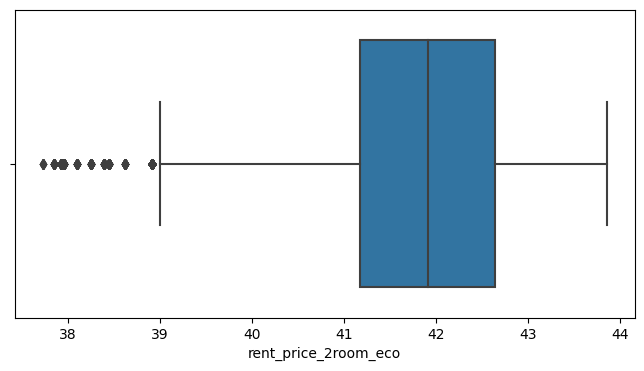

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=proc_data['rent_price_2room_eco'])

Проверим датасет для submition:

<Axes: xlabel='rent_price_2room_eco'>

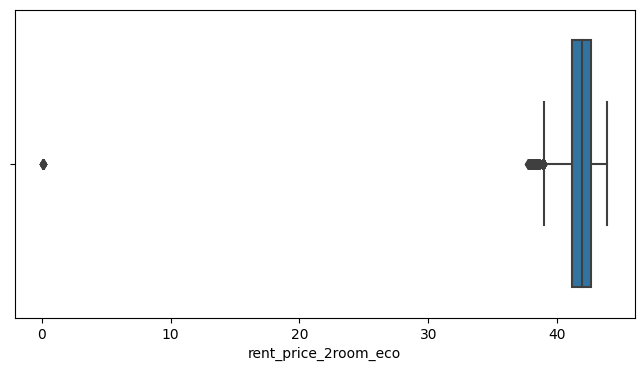

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=proc_sub['rent_price_2room_eco'])

In [ ]:
proc_sub[proc_sub['rent_price_2room_eco'] < 10].sample(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat,median_build_year_in_sub_area_dict,build_year_cat,median_max_floor_in_cat,median_num_room_in_sq_cat
3709,5945,2013-02-06,64,44.0,9.0,3.0,9.0,1.0,1971.0,2.0,7.0,123000,Kon'kovo,55485.2,14377.54,47.9,0.1,32.62,76.37,0,4,7.0,13.0,1971.0,4,9.0,2.0
909,6014,2013-02-12,55,30.0,11.0,3.0,17.0,1.0,2014.0,2.0,6.0,9553,Poselenie Voskresenskoe,55485.2,14377.54,47.9,0.1,32.62,76.37,0,3,6.0,11.0,2014.0,6,17.0,2.0
2160,5953,2013-02-07,45,26.0,12.0,1.0,16.0,1.0,1988.5,2.0,6.0,80791,Horoshevskoe,55485.2,14377.54,47.9,0.1,32.62,76.37,0,3,6.0,11.0,1988.5,5,16.0,2.0
2017,5927,2013-02-05,37,19.0,5.0,1.0,16.0,1.0,1999.0,1.0,6.0,21155,Mitino,55485.2,14377.54,47.9,0.1,32.62,76.37,0,2,6.0,8.0,1999.0,5,16.0,1.0
3150,5940,2013-02-06,58,43.0,4.0,4.0,9.0,1.0,1978.0,2.0,7.0,61396,Otradnoe,55485.2,14377.54,47.9,0.1,32.62,76.37,0,4,7.0,13.0,1978.0,4,9.0,2.0


In [ ]:
proc_sub[proc_sub['rent_price_2room_eco'] < 10]['timestamp'].sort_values().unique()

array(['2013-02-05', '2013-02-06', '2013-02-07', '2013-02-09',
       '2013-02-11', '2013-02-12', '2013-02-20', '2013-02-21',
       '2013-02-22'], dtype=object)

Та же проблема, исправим:

In [ ]:
proc_sub = replace_loan_price(proc_sub, 'rent_price_2room_eco', '2013-02', '2013-01', '2013-03')

Стоимость аренды за месяц до:  40.25
Стоимость аренды на следующий месяц:  41.96
Тогда искомое значение равно:  41.1


<Axes: xlabel='rent_price_2room_eco'>

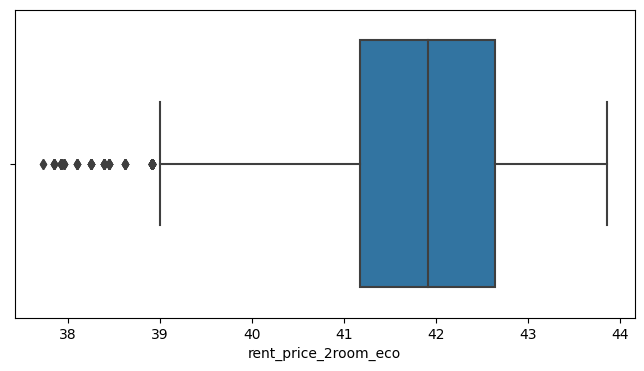

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=proc_sub['rent_price_2room_eco'])

### 1.5.7 Стоимость аренды 1-комнатной квартиры `rent_price_1room_eco`

Здесь также заниженная стоимость аренды:

<Axes: xlabel='rent_price_1room_eco'>

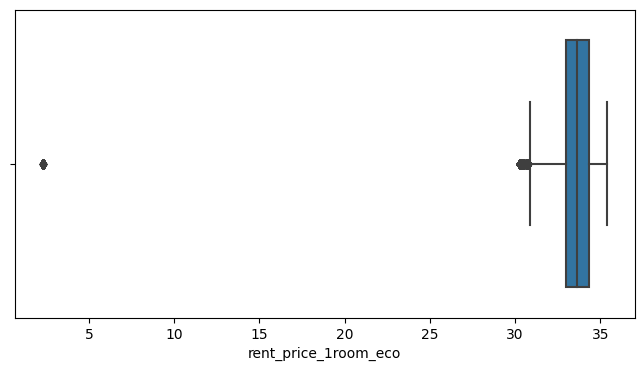

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=proc_data['rent_price_1room_eco'])

Исправим ее по тому же приципу:

In [ ]:
proc_data[proc_data['rent_price_1room_eco'] < 10].sample(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat,median_build_year_in_sub_area_dict,build_year_cat,median_max_floor_in_cat,median_num_room_in_sq_cat
181,8202,2013-05-29,82.0,57.0,5.0,2.0,16.0,1.0,1999.0,3.0,8.0,21155,Mitino,11478846,55485.2,14983.92,47.35,40.77,2.31,76.37,0,5,8.0,17.0,1999.0,5,16.0,3.0
6682,8057,2013-05-21,92.0,57.0,6.0,1.0,16.0,1.0,1999.0,3.0,10.0,21155,Mitino,13126042,55485.2,14983.92,47.35,40.77,2.31,76.37,0,6,10.0,25.0,1999.0,5,16.0,3.0
7873,8178,2013-05-28,38.0,20.0,15.0,3.0,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,6450000,55485.2,14983.92,47.35,40.77,2.31,76.37,0,2,6.0,8.0,1983.0,5,16.0,1.0
4132,7801,2013-05-07,101.0,66.0,7.0,3.0,17.0,1.0,2008.0,3.0,10.0,7341,Poselenie Moskovskij,7690127,55485.2,14983.92,47.35,40.77,2.31,76.37,0,6,10.0,25.0,2008.0,6,17.0,3.0
2915,8112,2013-05-23,60.0,40.0,23.0,2.0,23.0,1.0,2008.0,2.0,7.0,7341,Poselenie Moskovskij,5436451,55485.2,14983.92,47.35,40.77,2.31,76.37,0,4,7.0,13.0,2008.0,6,17.0,2.0


In [ ]:
proc_data[proc_data['rent_price_1room_eco'] < 10]['timestamp'].sort_values().unique()

array(['2013-05-04', '2013-05-06', '2013-05-07', '2013-05-08',
       '2013-05-13', '2013-05-14', '2013-05-15', '2013-05-16',
       '2013-05-17', '2013-05-20', '2013-05-21', '2013-05-22',
       '2013-05-23', '2013-05-25', '2013-05-27', '2013-05-28',
       '2013-05-29', '2013-05-30', '2013-05-31'], dtype=object)

In [ ]:
proc_data = replace_loan_price(proc_data, 'rent_price_1room_eco', '2013-05', '2013-04', '2013-06')

Стоимость аренды за месяц до:  32.61
Стоимость аренды на следующий месяц:  32.23
Тогда искомое значение равно:  32.42


<Axes: xlabel='rent_price_1room_eco'>

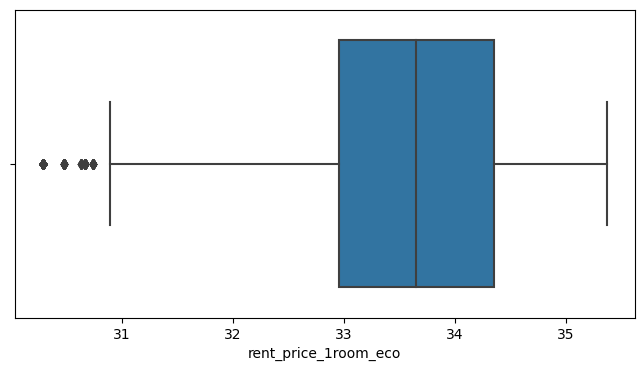

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=proc_data['rent_price_1room_eco'])

Проверим датасет submition:

In [ ]:
proc_sub[proc_sub['rent_price_1room_eco'] < 10].sample(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,fict_deal,sq_cat,avg_kitch_in_sq_cat,avg_diff_in_sq_cat,median_build_year_in_sub_area_dict,build_year_cat,median_max_floor_in_cat,median_num_room_in_sq_cat
608,8132,2013-05-24,43,28.0,5.0,1.0,9.0,1.0,1971.0,2.0,6.0,76156,Nagatino-Sadovniki,55485.2,14983.92,47.35,40.77,2.31,76.37,0,3,6.0,11.0,1971.0,4,9.0,2.0
2011,8022,2013-05-20,29,14.0,2.0,1.0,9.0,1.0,1965.0,1.0,6.0,101708,Juzhnoportovoe,55485.2,14983.92,47.35,40.77,2.31,76.37,0,2,6.0,8.0,1965.0,4,9.0,1.0
204,8121,2013-05-24,61,41.0,15.0,2.0,15.0,1.0,1975.0,2.0,7.0,77878,Orehovo-Borisovo Severnoe,55485.2,14983.92,47.35,40.77,2.31,76.37,0,4,7.0,13.0,1975.0,4,9.0,2.0
1221,7794,2013-05-06,36,22.0,8.0,1.0,17.0,1.0,2014.0,1.0,6.0,13890,Poselenie Sosenskoe,55485.2,14983.92,47.35,40.77,2.31,76.37,0,2,6.0,8.0,2014.0,6,17.0,1.0
560,7762,2013-05-06,59,39.0,25.0,3.0,25.0,1.0,2014.0,2.0,7.0,21819,Poselenie Desjonovskoe,55485.2,14983.92,47.35,40.77,2.31,76.37,0,4,7.0,13.0,2014.0,6,17.0,2.0


In [ ]:
proc_sub[proc_sub['rent_price_1room_eco'] < 10]['timestamp'].sort_values().unique()

array(['2013-05-06', '2013-05-07', '2013-05-08', '2013-05-13',
       '2013-05-14', '2013-05-16', '2013-05-20', '2013-05-21',
       '2013-05-23', '2013-05-24', '2013-05-25', '2013-05-27',
       '2013-05-28'], dtype=object)

In [ ]:
proc_sub = replace_loan_price(proc_sub, 'rent_price_1room_eco', '2013-05', '2013-04', '2013-06')

Стоимость аренды за месяц до:  32.61
Стоимость аренды на следующий месяц:  32.23
Тогда искомое значение равно:  32.42


<Axes: xlabel='rent_price_1room_eco'>

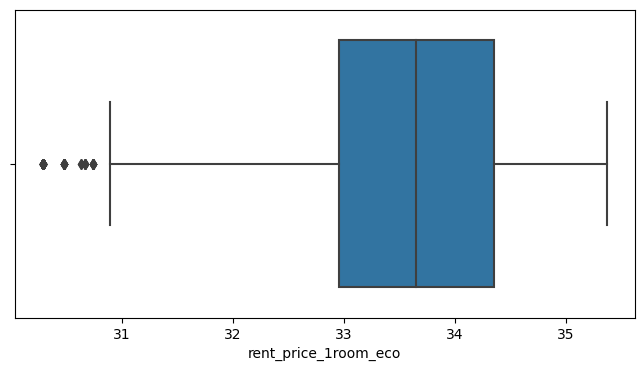

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=proc_sub['rent_price_1room_eco'])

## 1.6 Корреляционный анализ

### 1.6.1 Исходные данные

<ipython-input-220-8644b819fb2e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr(), annot=True, cbar=False, fmt=".1f");


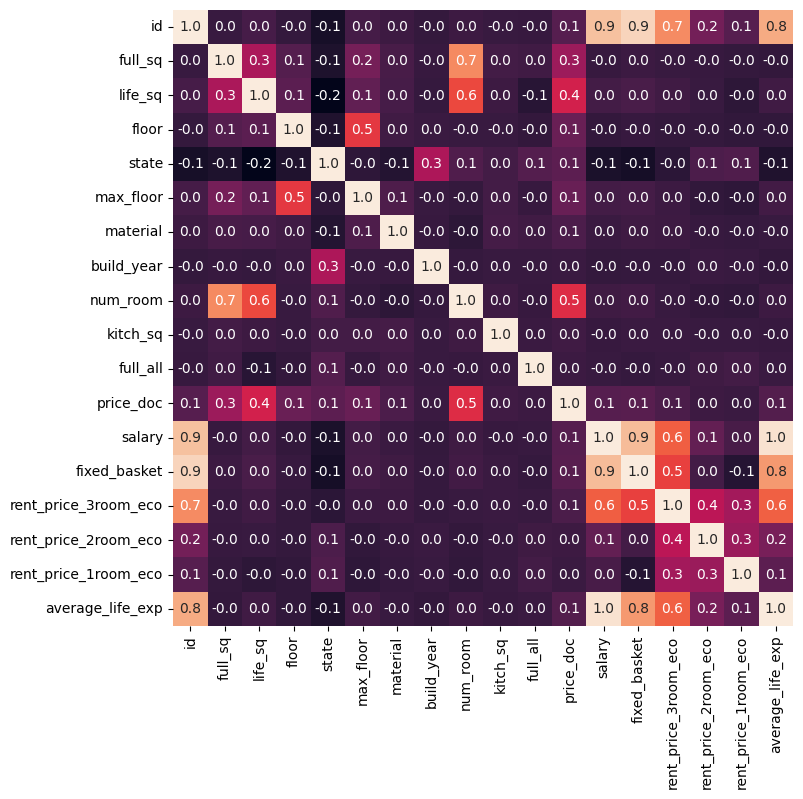

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(raw_data.corr(), annot=True, cbar=False, fmt=".1f");

Достаточно сильно кореллируют только жилая, общая площадь и количество комнат (сильно кореллирующие также и между собой), и кроме них этаж и жилищные условия.

### 1.6.2 Преобразованные данные

In [ ]:
use_columns = ['full_sq', 'life_sq', 'floor', 'state', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'full_all', \
               'salary', 'fixed_basket', 'rent_price_3room_eco', 'rent_price_2room_eco', 'rent_price_1room_eco', \
               'average_life_exp', 'fict_deal', 'price_doc']

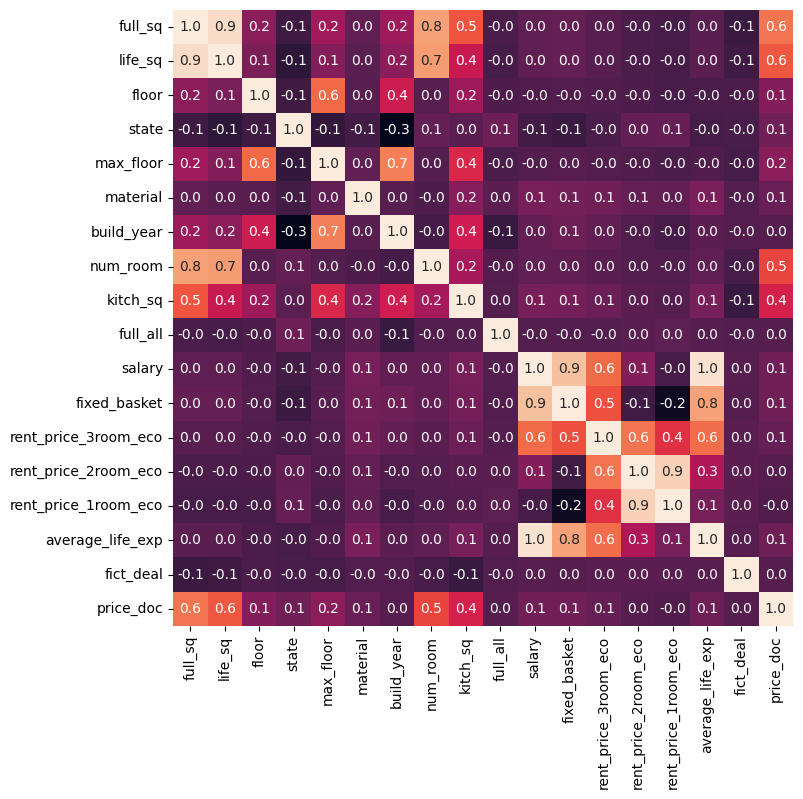

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(proc_data[use_columns].corr(numeric_only=False), annot=True, cbar=False, fmt=".1f");

Видно, что целевая переменная достаточно сильно корелдирует с различными площадями в квартире и количеством комнат (хотя они ожидаемо сильно коррелируют между собой), максимальный этаж, условия проживания, материал и экономические показатели.

Также должны кореллировать категориальный период постройки.

#2 Решение на подготовленных данных

##2.1 Линейная регрессия и создание новых предикторов

Протестируем возможности линейной регрессии:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from scipy.stats import f

Используем поэтапный отбор признаков на основе их вклада в модель, для того, чтобы получить наилучший результат:

In [ ]:
def LR(data, use_columns):
  X = data[use_columns[:-1]]
  Y = data['price_doc']

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

  model = LinearRegression()

  sig_lvl = 0.05

  sample_size = len(Y_test)

  factors_number = len(use_columns) - 1
  factors_to_use = [i for i in range(factors_number)]
  factors_to_test = []
  factors_in_model = []

  restricted_SSE = np.sum(np.square(Y_test - Y_test.mean()))

  flag = True
  while flag:
    full_SSE = [math.inf] * factors_number
    for i in factors_to_use:

      factors_to_test = factors_in_model.copy()
      factors_to_test.append(i)

      # print('Тестируемые факторы: ', factors_to_test)

      model.fit(X_train.iloc[:, factors_to_test], Y_train)
      prediction = model.predict(X_test.iloc[:, factors_to_test])

      full_SSE[i] = np.sum(np.square(prediction - Y_test))

    factor_candidate = np.argmin(full_SSE)
    print('Фактор-кандидат: ', factor_candidate)
    print('full_SSE: ', np.round(full_SSE, 2))

    df_RmF = 1
    df_Full = sample_size - len(factors_to_test) - 1
    F = ((restricted_SSE - full_SSE[factor_candidate]) / df_RmF) / (full_SSE[factor_candidate] / df_Full)
    print('F', F)
    p_value = 1 - f.cdf(F, df_RmF, df_Full)

    if p_value < sig_lvl:
      restricted_SSE = full_SSE[factor_candidate]
      factors_in_model.append(factor_candidate)
      factors_to_use.remove(factor_candidate)
    else:
      flag = False

    print('p-value: ', p_value)
    print('Факторы в модели: ', factors_in_model)
    print('\n----------------')

    if(len(factors_to_test) == 0):
      flag = False
      print('Все факторы включены в модель')

  print('Факторы вошедшие в модель:')
  for i in factors_in_model:
    print(use_columns[i])

  model.fit(X_train.iloc[:, factors_in_model], Y_train)
  score = model.score(X_train.iloc[:, factors_in_model], Y_train)
  print('score на тренировочной выборке: ', score)

  prediction = model.predict(X_test.iloc[:, factors_in_model])
  mae = mean_absolute_error(Y_test, prediction)
  print('MAE на тестовой выборке: ', mae)

  return prediction

In [ ]:
LR_prediction = LR(proc_data[use_columns], use_columns)

Фактор-кандидат:  0
full_SSE:  [4.36249923e+16 4.83128253e+16 6.77633066e+16 6.78529416e+16
 6.81492201e+16 6.88151822e+16 6.88506067e+16 5.27055575e+16
 5.88928678e+16 6.88104659e+16 6.86287479e+16 6.86263919e+16
 6.87765179e+16 6.87764799e+16 6.88025133e+16 6.86269543e+16
 6.87988561e+16]
F 1739.0394774934996
p-value:  1.1102230246251565e-16
Факторы в модели:  [0]

----------------
Фактор-кандидат:  6
full_SSE:  [           inf 4.36444882e+16 4.36800968e+16 4.21115955e+16
 4.37779587e+16 4.35869813e+16 4.19057501e+16 4.35993858e+16
 4.35788602e+16 4.35982093e+16 4.34247392e+16 4.35437576e+16
 4.35515818e+16 4.35777171e+16 4.36121756e+16 4.33945219e+16
 4.28666477e+16]
F 123.7356284028327
p-value:  1.1102230246251565e-16
Факторы в модели:  [0, 6]

----------------
Фактор-кандидат:  3
full_SSE:  [           inf 4.15687593e+16 4.15244864e+16 4.10843594e+16
 4.13870799e+16 4.18876382e+16            inf 4.18783680e+16
 4.13251603e+16 4.19161148e+16 4.16491809e+16 4.17359747e+16
 4.1796006

Результат достаточно плохой.

Попробуем для категориальных данных провести One Hot Encoding:

Этажи здания разделим на 1, все промежуточные и последний:

In [ ]:
def find_floor_cat(data):
  data['floor_cat'] = np.where((data['floor'] > 1) & (data['floor'] < data['max_floor']), 'mid_floor', np.nan)
  data['floor_cat'] = data['floor_cat'].mask(data['floor'] == 1, 'first_floor')
  data['floor_cat'] = data['floor_cat'].mask(data['floor'] == data['max_floor'], 'max_floor')

  return data

In [ ]:
proc_data = find_floor_cat(proc_data)
proc_sub = find_floor_cat(proc_sub)

Район расположения дома закодируем [по уровню его дороговизны](https://www.mirkvartir.ru/journal/analytics/2023/06/02/ceny-na-malenkie/). Используем рейтинг за 21 год. Разобъм на 5 категорий:

In [ ]:
proc_data.sub_area.unique()

array(['Pechatniki', 'Dorogomilovo', 'Ivanovskoe', 'Jasenevo',
       'Nagatinskij Zaton', 'Rjazanskij', 'Caricyno', "Kon'kovo",
       'Vyhino-Zhulebino', 'Nekrasovka', 'Poselenie Sosenskoe', 'Mitino',
       'Matushkino', 'Ostankinskoe', 'Krylatskoe', 'Otradnoe',
       'Mozhajskoe', 'Teplyj Stan', 'Poselenie Shherbinka',
       'Juzhnoe Medvedkovo', 'Butyrskoe', 'Birjulevo Zapadnoe',
       'Horoshevo-Mnevniki', 'Orehovo-Borisovo Juzhnoe', 'Ramenki',
       'Poselenie Voskresenskoe', 'Nagatino-Sadovniki', 'Golovinskoe',
       'Savelovskoe', 'Brateevo', "Krasnosel'skoe", 'Bogorodskoe',
       'Birjulevo Vostochnoe', 'Severnoe Izmajlovo', 'Preobrazhenskoe',
       'Beskudnikovskoe', 'Poselenie Vnukovskoe', 'Sviblovo', 'Hovrino',
       'Danilovskoe', 'Severnoe Butovo', "Moskvorech'e-Saburovo",
       'Chertanovo Juzhnoe', 'Presnenskoe', 'Poselenie Moskovskij',
       'Akademicheskoe', 'Ochakovo-Matveevskoe', 'Kotlovka',
       'Metrogorodok', 'Tverskoe', 'Begovoe', 'Juzhnoe Butovo',


In [ ]:
#@title #### Справочник категорий районов

first_cat = ('Tverskoe', 'Jakimanka', "Zamoskvorech'e", 'Hamovniki', 'Arbat',) #500-400
second_cat = ('Dorogomilovo', 'Ramenki', "Krasnosel'skoe", 'Presnenskoe', 'Begovoe', 'Taganskoe', 'Basmannoe', 'Donskoe', 'Gagarinskoe', \
              'Meshhanskoe', ) #400-300
third_cat = ('Jasenevo', 'Nagatinskij Zaton', 'Caricyno', "Kon'kovo", 'Mitino', 'Ostankinskoe', 'Krylatskoe', 'Mozhajskoe', 'Teplyj Stan', \
             'Butyrskoe', 'Horoshevo-Mnevniki', 'Nagatino-Sadovniki', 'Golovinskoe', 'Savelovskoe', 'Bogorodskoe', 'Severnoe Izmajlovo', \
             'Preobrazhenskoe', 'Sviblovo', 'Hovrino', 'Danilovskoe', "Moskvorech'e-Saburovo", 'Akademicheskoe', 'Ochakovo-Matveevskoe', \
             'Kotlovka', 'Lomonosovskoe', 'Sokolinaja Gora', 'Severnoe Tushino', 'Lianozovo', "Tekstil'shhiki", 'Koptevo', 'Nagornoe', \
             'Horoshevskoe', 'Izmajlovo', 'Chertanovo Severnoe', 'Ajeroport', 'Severnoe Medvedkovo', 'Strogino', 'Kuncevo', 'Vojkovskoe', \
             'Orehovo-Borisovo Severnoe', 'Zjuzino', 'Kosino-Uhtomskoe', 'Fili Davydkovo', 'Nizhegorodskoe', 'Lefortovo', 'Pokrovskoe Streshnevo', \
             'Cheremushki', 'Juzhnoportovoe', "Mar'ina Roshha", 'Troparevo-Nikulino', 'Obruchevskoe', 'Timirjazevskoe', 'Kurkino', \
             'Jaroslavskoe', "Kuz'minki", 'Filevskij Park', 'Juzhnoe Tushino', 'Marfino', 'Vostochnoe Izmajlovo', 'Shhukino', 'Sokol', \
             'Prospekt Vernadskogo', 'Rostokino', 'Levoberezhnoe', "Sokol'niki", 'Alekseevskoe',) #300-200
fourth_cat = ('Pechatniki', 'Ivanovskoe', 'Rjazanskij', 'Vyhino-Zhulebino', 'Nekrasovka', 'Poselenie Sosenskoe', 'Matushkino', 'Otradnoe', \
              'Poselenie Shherbinka', 'Juzhnoe Medvedkovo', 'Birjulevo Zapadnoe', 'Orehovo-Borisovo Juzhnoe', 'Poselenie Voskresenskoe', \
              'Brateevo', 'Birjulevo Vostochnoe', 'Beskudnikovskoe', 'Poselenie Vnukovskoe', 'Severnoe Butovo', 'Chertanovo Juzhnoe', \
              'Poselenie Moskovskij', 'Metrogorodok', 'Juzhnoe Butovo', 'Veshnjaki', 'Krjukovo', 'Babushkinskoe', 'Poselenie Filimonkovskoe', \
              "Altuf'evskoe", 'Kapotnja', 'Zapadnoe Degunino', "Chertanovo Central'noe", "Mar'ino", 'Novokosino', 'Bibirevo', 'Ljublino', \
              'Bibirevo', 'Staroe Krjukovo', 'Poselenie Pervomajskoe', 'Severnoe', 'Novogireevo', 'Poselenie Marushkinskoe', 'Losinoostrovskoe', \
              'Perovo', 'Silino', 'Poselenie Desjonovskoe', 'Solncevo', "Gol'janovo", 'Poselenie Krasnopahorskoe', 'Vostochnoe', 'Savelki', \
              'Troickij okrug', 'Vostochnoe Degunino', 'Dmitrovskoe', 'Novo-Peredelkino', 'Poselenie Rjazanovskoe', 'Poselenie Mosrentgen', \
              'Vnukovo', 'Zjablikovo', 'Poselenie Kokoshkino', 'Poselenie Shhapovskoe', 'Molzhaninovskoe',) #200-100
fifth_cat = ('Poselenie Novofedorovskoe', 'Poselenie Voronovskoe', 'Poselenie Klenovskoe', 'Poselenie Rogovskoe', 'Poselenie Kievskij', \
             'Poselenie Mihajlovo-Jarcevskoe') #100-0

In [ ]:
def find_loc_cat(data):
  data['area_cat'] = np.where(data['sub_area'].isin(first_cat), '1', np.nan)
  data['area_cat'] = data['area_cat'].mask(data['sub_area'].isin(second_cat), '2')
  data['area_cat'] = data['area_cat'].mask(data['sub_area'].isin(third_cat), '3')
  data['area_cat'] = data['area_cat'].mask(data['sub_area'].isin(fourth_cat), '4')
  data['area_cat'] = data['area_cat'].mask(data['sub_area'].isin(fifth_cat), '5')

  return data

In [ ]:
proc_data = find_loc_cat(proc_data)
proc_sub = find_loc_cat(proc_sub)

Выполним One Hot Encoding:

In [ ]:
def ohe(data):
  data = pd.get_dummies(data=data, columns=['material', 'build_year_cat', 'floor_cat', 'area_cat', 'state'])
  data = pd.get_dummies(data=data, columns=['sq_cat'], dummy_na=True)

  return data

In [ ]:
proc_data = ohe(proc_data)
proc_sub = ohe(proc_sub)

Снова проверим линейную регрессию, добавив новые колонки:

In [ ]:
use_columns = ['full_sq', 'life_sq', 'max_floor', 'num_room', 'kitch_sq', 'full_all', \
               'salary', 'fixed_basket', 'rent_price_3room_eco', 'rent_price_2room_eco', 'rent_price_1room_eco','average_life_exp', \
               'fict_deal', 'material_1.0', 'material_2.0', 'material_4.0', 'material_5.0', 'material_6.0', 'build_year_cat_1', \
               'build_year_cat_2', 'build_year_cat_3', 'build_year_cat_4', 'build_year_cat_5', 'build_year_cat_6', 'floor_cat_first_floor', \
               'floor_cat_max_floor', 'floor_cat_mid_floor', 'area_cat_1', 'area_cat_2', 'area_cat_3', 'area_cat_4', 'area_cat_5', \
               'state_1.0', 'state_2.0', 'state_3.0', 'state_4.0', 'sq_cat_1', 'sq_cat_2', 'sq_cat_3', 'sq_cat_4', 'sq_cat_5', 'sq_cat_6', \
               'sq_cat_nan', 'price_doc']

In [ ]:
LR_prediction = LR(proc_data[use_columns], use_columns)

Фактор-кандидат:  0
full_SSE:  [4.36249923e+16 4.83128253e+16 6.81492201e+16 5.27055575e+16
 5.88928678e+16 6.88104659e+16 6.86287479e+16 6.86263919e+16
 6.87765179e+16 6.87764799e+16 6.88025133e+16 6.86269543e+16
 6.87988561e+16 6.80249891e+16 6.79627544e+16 6.78780976e+16
 6.84545380e+16 6.88999317e+16 6.80256962e+16 6.75942034e+16
 6.75957251e+16 6.71209401e+16 6.84472093e+16 6.88559234e+16
 6.82622126e+16 6.87704160e+16 6.87917679e+16 6.77998259e+16
 6.56634319e+16 6.68202794e+16 6.28235991e+16 6.85212150e+16
 6.87830110e+16 6.81667534e+16 6.84284666e+16 6.75936680e+16
 6.85200741e+16 6.26689744e+16 6.70475316e+16 6.86330982e+16
 6.36114671e+16 5.50508962e+16 6.87988561e+16]
F 1739.0394774934996
p-value:  1.1102230246251565e-16
Факторы в модели:  [0]

----------------
Фактор-кандидат:  30
full_SSE:  [           inf 4.36444882e+16 4.37779587e+16 4.35993858e+16
 4.35788602e+16 4.35982093e+16 4.34247392e+16 4.35437576e+16
 4.35515818e+16 4.35777171e+16 4.36121756e+16 4.33945219e+16
 4

Линейная регрессия не показывает примелимых результатов.

##2.2 Gradient Boosting Regressor

Протестируем Gradient Boosting Regressor:

In [ ]:
from sklearn import ensemble

In [ ]:
X = proc_data[use_columns[:-1]]
Y = proc_data['price_doc']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'absolute_error',
          'random_state': 42}

GBR = ensemble.GradientBoostingRegressor(**params, validation_fraction=0.2, n_iter_no_change=20)
GBR.fit(X_train, Y_train)

mae = mean_absolute_error(Y_test, GBR.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

The mean absolute error (MAE) on test set: 1827889.1097


Отберем лучшую связку гиперпараметров:

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GBR = ensemble.GradientBoostingRegressor()

params = {'n_estimators': [500, 800, 1000, 1200],
          'max_depth': [4, 5, 8, 10],
          'min_samples_split': [5],
          'learning_rate': [0.01],
          'loss': ['squared_error', 'absolute_error'],
          'random_state': [42]}

cv = GridSearchCV(GBR, params, cv=5)

cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [4, 5, 8, 10], 'min_samples_split': [5],
                         'n_estimators': [500, 800, 1000, 1200],
                         'random_state': [42]})

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

Best parameters are: {'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 1200, 'random_state': 42}


0.634 + or -0.039 for the {'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 500, 'random_state': 42}
0.642 + or -0.039 for the {'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 800, 'random_state': 42}
0.644 + or -0.039 for the {'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 1000, 'random_state': 42}
0.646 + or -0.039 for the {'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 1200, 'random_state': 42}
0.629 + or -0.036 for the {'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 500, 'random_state': 42}
0.635 + or -0.036 for the {'learning_rate': 0.01, 'loss': 'squa

In [ ]:
params = {'n_estimators': 1200,
          'max_depth': 8,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error',
          'random_state': 42}

GBR = ensemble.GradientBoostingRegressor(**params, validation_fraction=0.2, n_iter_no_change=20)
GBR.fit(X_train, Y_train)

mae = mean_absolute_error(Y_test, GBR.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

The mean absolute error (MAE) on test set: 1800551.4949


Почему-то лучшая модель, по мнению алгоритма, дает плохой резульат на тестовой выборке.

Сделаем подбор гиперпараметров вручную:

In [ ]:
min_mae = math.inf
func_best = 0
n_best = 0
depth_best = 0

for func in ['squared_error', 'absolute_error']:
  for n in [300, 500, 800, 1000]:
    for depth in [5, 8, 10]:

      params = {'n_estimators': n,
                'max_depth': depth,
                'min_samples_split': 5,
                'learning_rate': 0.01,
                'loss': func,
                'random_state': 42}

      GBR = ensemble.GradientBoostingRegressor(**params, validation_fraction=0.2, n_iter_no_change=20)
      GBR.fit(X_train, Y_train)

      mae = mean_absolute_error(Y_test, GBR.predict(X_test))

      print('Текущий тест: n_estimators = ', n, 'max_depth = ', depth, 'loss_func = ', func)
      print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
      print('\n----------------')

      if mae < min_mae:
        min_mae = mae

        func_best = func
        n_best = n
        depth_best = depth

print('Лучший набор гиперпараметров: n_estimators = ', n_best, 'max_depth = ', depth_best, 'loss_func = ', func_best)
print('Лучший результат (MAE) на тестовой выборке:'.format(min_mae))

Текущий тест: n_estimators =  300 max_depth =  5 loss_func =  squared_error
The mean absolute error (MAE) on test set: 1930965.4375

----------------
Текущий тест: n_estimators =  300 max_depth =  8 loss_func =  squared_error
The mean absolute error (MAE) on test set: 1844212.8467

----------------
Текущий тест: n_estimators =  300 max_depth =  10 loss_func =  squared_error
The mean absolute error (MAE) on test set: 1851575.0847

----------------
Текущий тест: n_estimators =  500 max_depth =  5 loss_func =  squared_error
The mean absolute error (MAE) on test set: 1873156.2174

----------------
Текущий тест: n_estimators =  500 max_depth =  8 loss_func =  squared_error
The mean absolute error (MAE) on test set: 1810705.3918

----------------
Текущий тест: n_estimators =  500 max_depth =  10 loss_func =  squared_error
The mean absolute error (MAE) on test set: 1842207.7913

----------------
Текущий тест: n_estimators =  800 max_depth =  5 loss_func =  squared_error
The mean absolute erro

In [ ]:
params = {'n_estimators': 1000,
          'max_depth': 8,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'absolute_error',
          'random_state': 42}

GBR = ensemble.GradientBoostingRegressor(**params, validation_fraction=0.2, n_iter_no_change=20)
GBR.fit(X_train, Y_train)

mae = mean_absolute_error(Y_test, GBR.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

The mean absolute error (MAE) on test set: 1648447.3000


Получился хороший результат относительно линейной регрессии, но все равно недостаточный.

##2.3 XGBoost

Попробуем XGBoost:

In [ ]:
from xgboost import XGBRegressor

In [ ]:
X = proc_data[use_columns[:-1]]
Y = proc_data['price_doc']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
bst = XGBRegressor(n_estimators=1200, max_depth=12, learning_rate=0.01, objective='reg:squarederror')

bst.fit(X_train, Y_train)

preds = bst.predict(X_test)

mae = mean_absolute_error(Y_test, preds)
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

The mean absolute error (MAE) on test set: 1817814.5884


Подберем гиперпараметры:

In [ ]:
min_mae = math.inf
func_best = 0
n_best = 0
depth_best = 0

for func in ['reg:squarederror', 'reg:absoluteerror']:
  for n in [300, 500, 800, 1000, 1200]:
    for depth in [3, 4, 5, 8, 10]:

      params = {'n_estimators': n,
                'max_depth': depth,
                'learning_rate': 0.01,
                'objective': func,
                'random_state': 42}

      bst = XGBRegressor(**params)
      bst.fit(X_train, Y_train)

      mae = mean_absolute_error(Y_test, bst.predict(X_test))

      print('Текущий тест: n_estimators = ', n, 'max_depth = ', depth, 'loss_func = ', func)
      print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
      print('\n----------------')

      if mae < min_mae:
        min_mae = mae

        func_best = func
        n_best = n
        depth_best = depth

print('Лучший набор гиперпараметров: n_estimators = ', n_best, 'max_depth = ', depth_best, 'loss_func = ', func_best)
print('Лучший результат (MAE) на тестовой выборке:'.format(min_mae))

Текущий тест: n_estimators =  300 max_depth =  3 loss_func =  reg:squarederror
The mean absolute error (MAE) on test set: 2104067.8558

----------------
Текущий тест: n_estimators =  300 max_depth =  4 loss_func =  reg:squarederror
The mean absolute error (MAE) on test set: 2057094.5483

----------------
Текущий тест: n_estimators =  300 max_depth =  5 loss_func =  reg:squarederror
The mean absolute error (MAE) on test set: 2007315.6013

----------------
Текущий тест: n_estimators =  300 max_depth =  8 loss_func =  reg:squarederror
The mean absolute error (MAE) on test set: 1936779.6387

----------------
Текущий тест: n_estimators =  300 max_depth =  10 loss_func =  reg:squarederror
The mean absolute error (MAE) on test set: 1934594.2750

----------------
Текущий тест: n_estimators =  500 max_depth =  3 loss_func =  reg:squarederror
The mean absolute error (MAE) on test set: 1975079.2902

----------------
Текущий тест: n_estimators =  500 max_depth =  4 loss_func =  reg:squarederror
Th

In [ ]:
bst = XGBRegressor(n_estimators=1200, max_depth=8, learning_rate=0.01, objective='reg:squarederror')

bst.fit(X_train, Y_train)

preds = bst.predict(X_test)

mae = mean_absolute_error(Y_test, preds)
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

The mean absolute error (MAE) on test set: 1762216.7477


Результат хуже, чем на прошлой модели.

##2.4 CatBoost

Попробуем CatBoost:

In [ ]:
!pip install catboost

y
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool

In [ ]:
X = proc_data[use_columns[:-1]]
Y = proc_data['price_doc']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
cbr = CatBoostRegressor(iterations=1000,
                          depth=6,
                          learning_rate=0.03,
                          loss_function='MAE',
                          random_seed=42)

train_pool = Pool(X_train, Y_train)
val_pool = Pool(X_test, Y_test)
test_pool = Pool(X_test)

cbr.fit(train_pool, logging_level='Silent', eval_set=val_pool, early_stopping_rounds=20)

preds = cbr.predict(test_pool)

mae = mean_absolute_error(Y_test, preds)
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

The mean absolute error (MAE) on test set: 1606982.6710


Подберем гиперпараметры:

In [ ]:
min_mae = math.inf
func_best = 0
n_best = 0
depth_best = 0

train_pool = Pool(X_train, Y_train)
val_pool = Pool(X_test, Y_test)
test_pool = Pool(X_test)

for func in ['RMSE', 'MAE']:
  for n in [300, 500, 800, 1000, 1200]:
    for depth in [3, 4, 5, 8, 10]:
      for rate in [0.01, 0.03]:

        params = {'iterations': n,
                  'depth': depth,
                  'learning_rate': rate,
                  'objective': func,
                  'random_seed': 42}

        cbr = CatBoostRegressor(**params)

        cbr.fit(train_pool, logging_level='Silent', eval_set=val_pool, early_stopping_rounds=20)

        mae = mean_absolute_error(Y_test, cbr.predict(test_pool))

        print('Текущий тест: n_estimators = ', n, 'max_depth = ', depth, 'loss_func = ', func, 'learning_rate = ', rate)
        print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
        print('\n----------------')

        if mae < min_mae:
          min_mae = mae

          func_best = func
          n_best = n
          depth_best = depth

print('Лучший набор гиперпараметров: n_estimators = ', n_best, 'max_depth = ', depth_best, 'loss_func = ', func_best, 'learning_rate = ', rate)
print('Лучший результат (MAE) на тестовой выборке:'.format(min_mae))

Текущий тест: n_estimators =  300 max_depth =  3 loss_func =  RMSE learning_rate =  0.01
The mean absolute error (MAE) on test set: 2103598.7422

----------------
Текущий тест: n_estimators =  300 max_depth =  3 loss_func =  RMSE learning_rate =  0.03
The mean absolute error (MAE) on test set: 1982940.4935

----------------
Текущий тест: n_estimators =  300 max_depth =  4 loss_func =  RMSE learning_rate =  0.01
The mean absolute error (MAE) on test set: 2068907.8045

----------------
Текущий тест: n_estimators =  300 max_depth =  4 loss_func =  RMSE learning_rate =  0.03
The mean absolute error (MAE) on test set: 1956361.5223

----------------
Текущий тест: n_estimators =  300 max_depth =  5 loss_func =  RMSE learning_rate =  0.01
The mean absolute error (MAE) on test set: 2037472.5265

----------------
Текущий тест: n_estimators =  300 max_depth =  5 loss_func =  RMSE learning_rate =  0.03
The mean absolute error (MAE) on test set: 1923487.1217

----------------
Текущий тест: n_estima

In [ ]:
X = proc_data[use_columns[:-1]]
Y = proc_data['price_doc']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

cbr = CatBoostRegressor(iterations=1000,
                          depth=8,
                          learning_rate=0.03,
                          loss_function='MAE',
                          random_seed=42)

train_pool = Pool(X_train, Y_train)
val_pool = Pool(X_test, Y_test)
test_pool = Pool(X_test)

cbr.fit(train_pool, logging_level='Silent', eval_set=val_pool, early_stopping_rounds=20)

preds = cbr.predict(test_pool)

mae = mean_absolute_error(Y_test, preds)
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

The mean absolute error (MAE) on test set: 1605775.6535


CatBoost показывает немного лучший резульат, чем лучший до него GradientBoostRegressor.

#3 Предсказание для submission

In [ ]:
submission = pd.read_csv('submission.csv')

In [ ]:
sub_pool = Pool(proc_sub[use_columns[:-1]])

submission['price_doc'] = cbr.predict(sub_pool)

submission.to_csv('Submission.csv', index=False)